simulation 1 : main effect

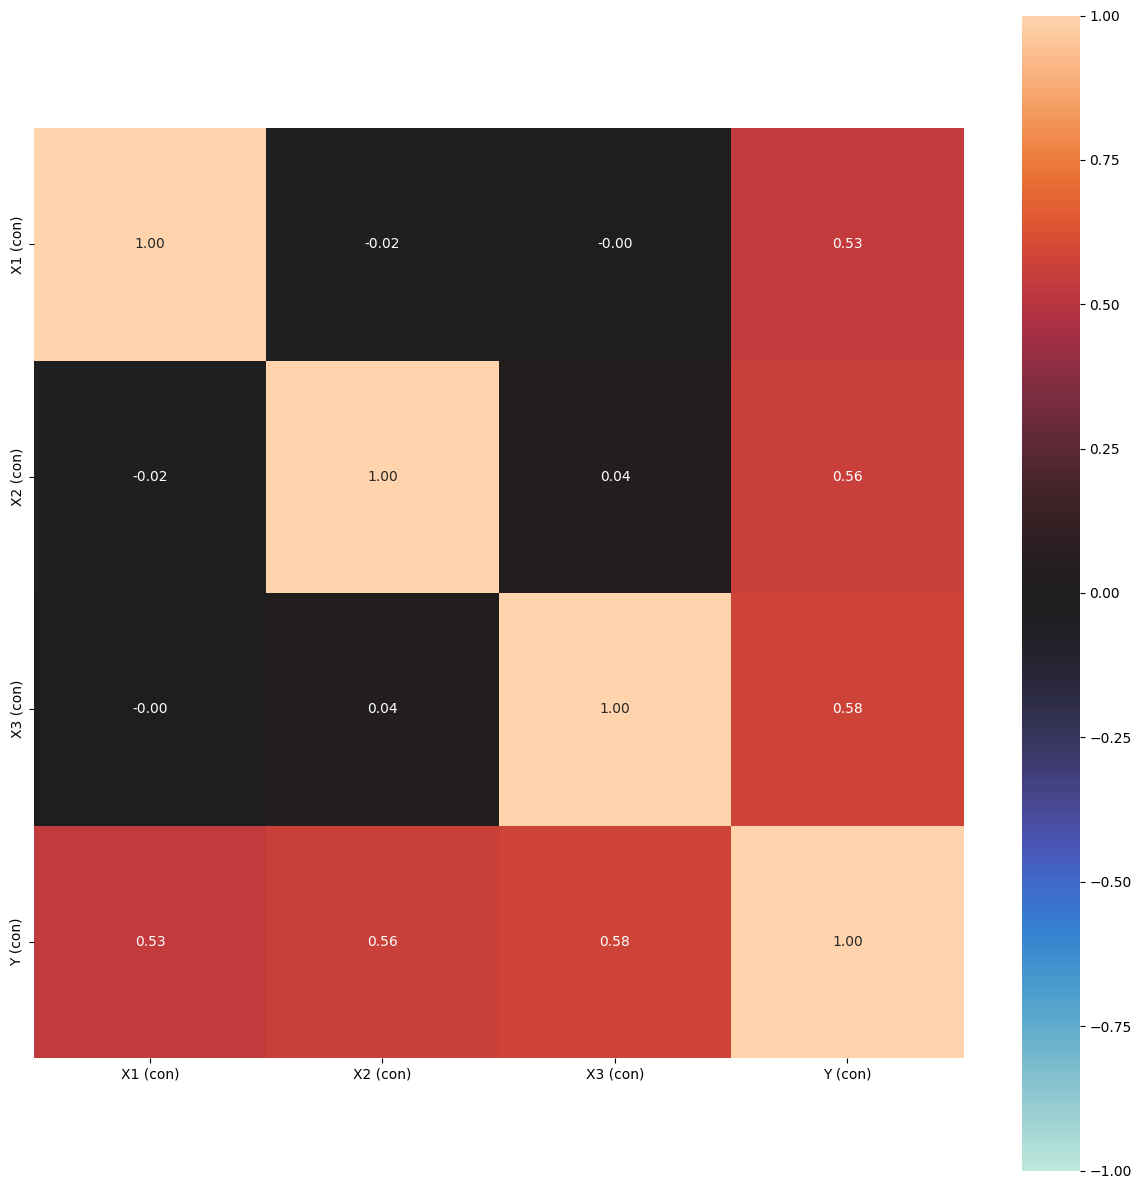

Linear Regression R^2 Score: 0.9038707330253514
Random Forest Regression R^2 Score: 0.875976727247472
SVM Regression R^2 Score: 0.9038857378995648
XGBoost Regression R^2 Score: 0.8689300458965774


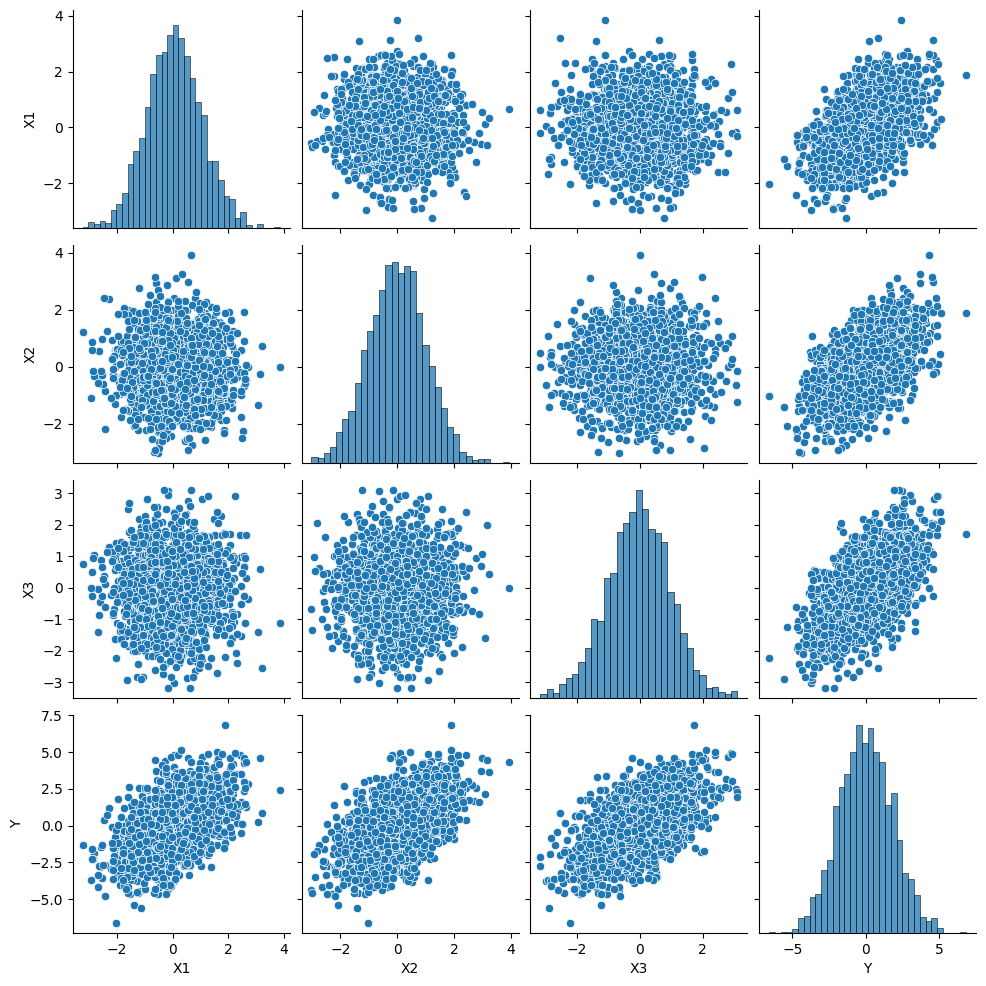

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import seaborn as sns
import pandas as pd
from dython.nominal import associations  # correlation calculation
import matplotlib.pyplot as plt
# Generating synthetic regression data with 3 separate features and noise
np.random.seed(42)
num_samples = 2000

# Generating each feature separately
X1 = np.random.randn(num_samples)  # Feature 1
X2 = np.random.randn(num_samples)  # Feature 2
X3 = np.random.randn(num_samples)  # Feature 3

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.5, num_samples)  # Adding noise
y = X1 + X2 + X3 + noise

# Reshape features to a 2D array
X = np.vstack((X1, X2, X3)).T

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)
mlpr_model = MLPRegressor(hidden_layer_sizes=50,max_iter=1000)
mlpr_model.fit(X_train, y_train)
# Evaluate models
linear_reg_score = linear_reg.score(X_test, y_test)
rf_reg_score = rf_reg.score(X_test, y_test)
svm_reg_score = svm_reg.score(X_test, y_test)
xgb_reg_score = xgb_reg.score(X_test, y_test)
data = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"X3":X[:,2],"Y":y})
correlation_matrix = associations(
    data, mark_columns=True, compute_only=False, figsize=(15, 15),annot=True)
sns.pairplot(data)
print(f"Linear Regression R^2 Score: {linear_reg_score}")
print(f"Random Forest Regression R^2 Score: {rf_reg_score}")
print(f"SVM Regression R^2 Score: {svm_reg_score}")
print(f"XGBoost Regression R^2 Score: {xgb_reg_score}")


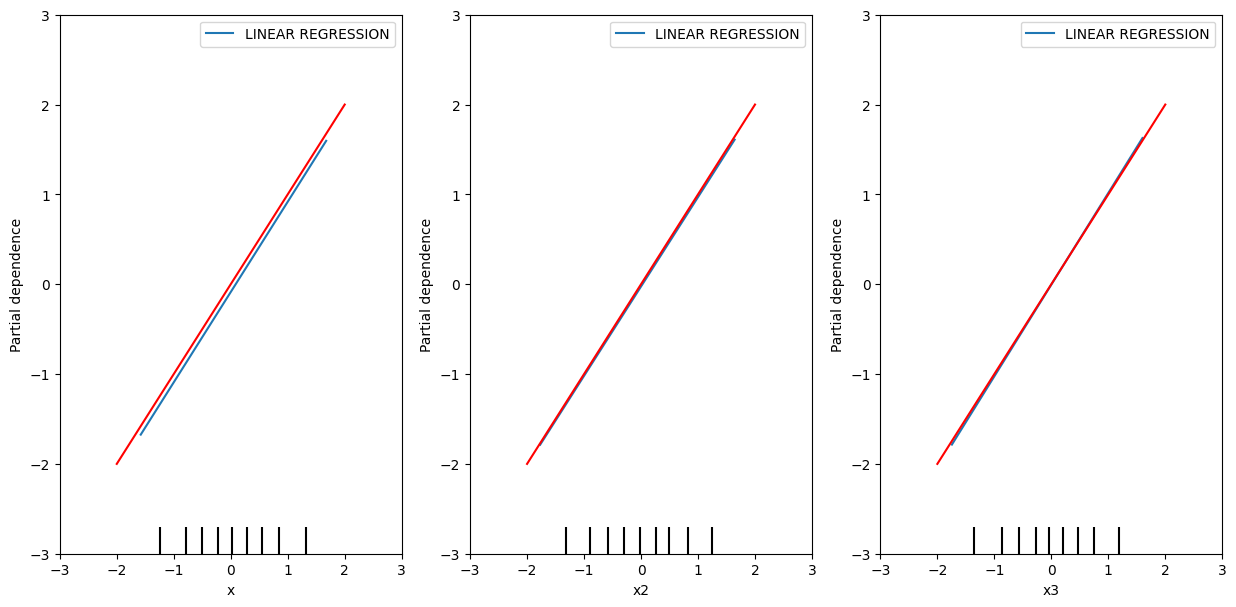

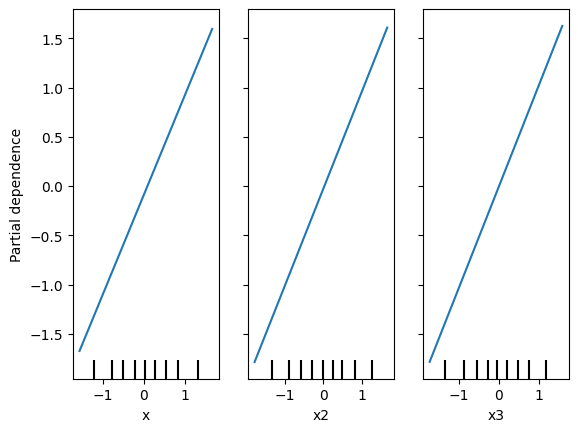

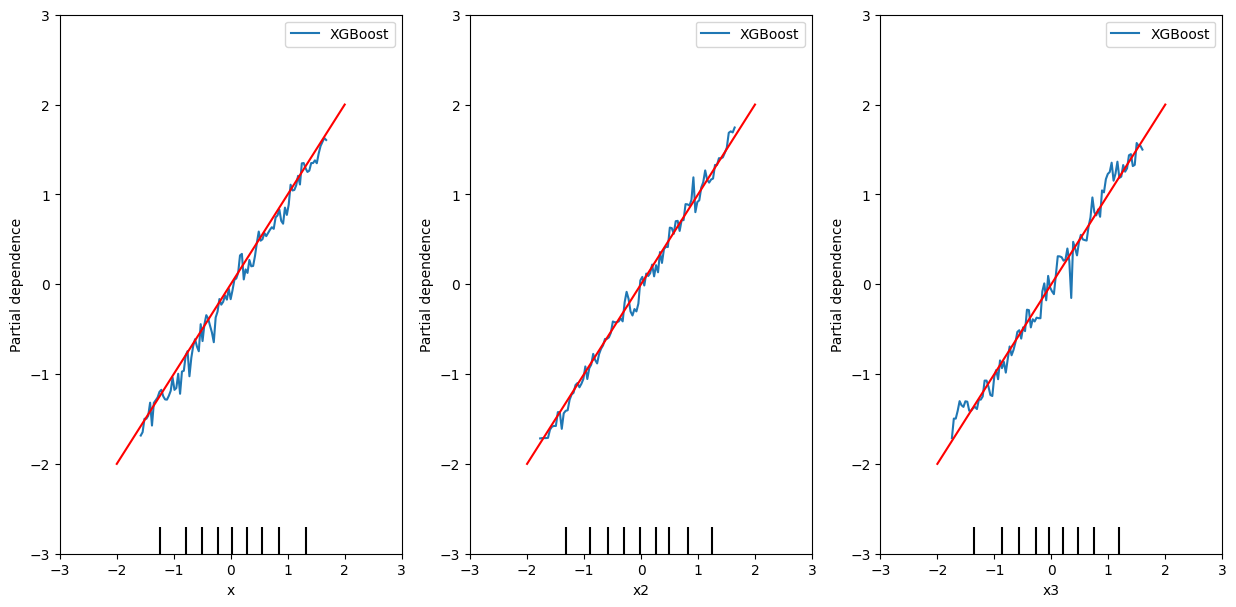

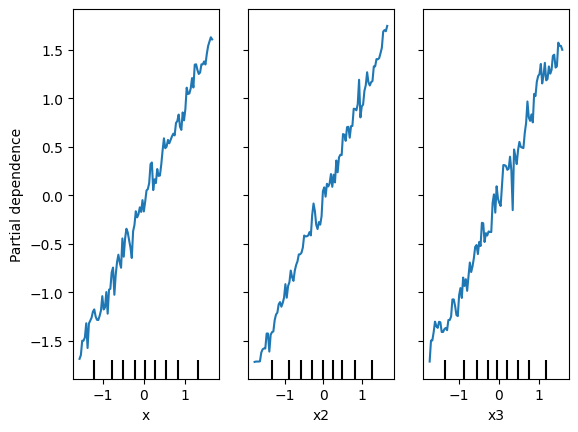

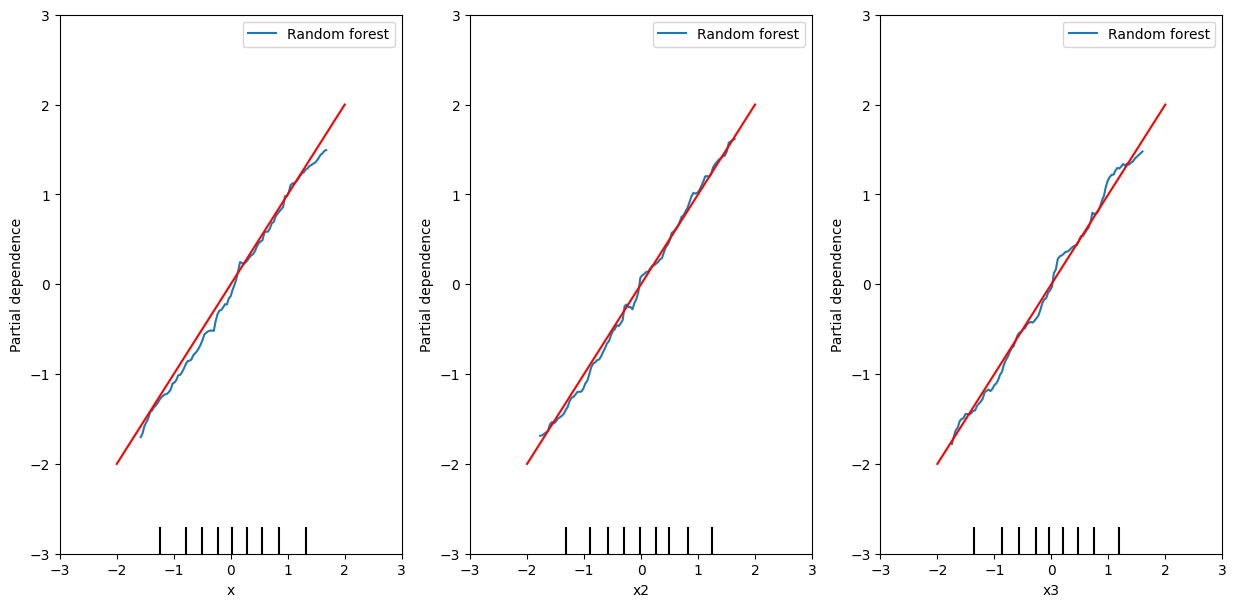

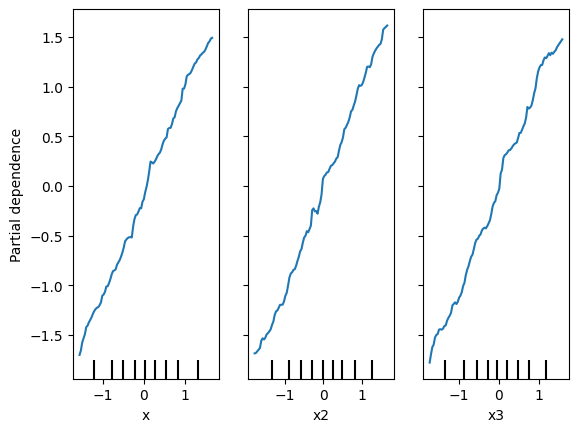

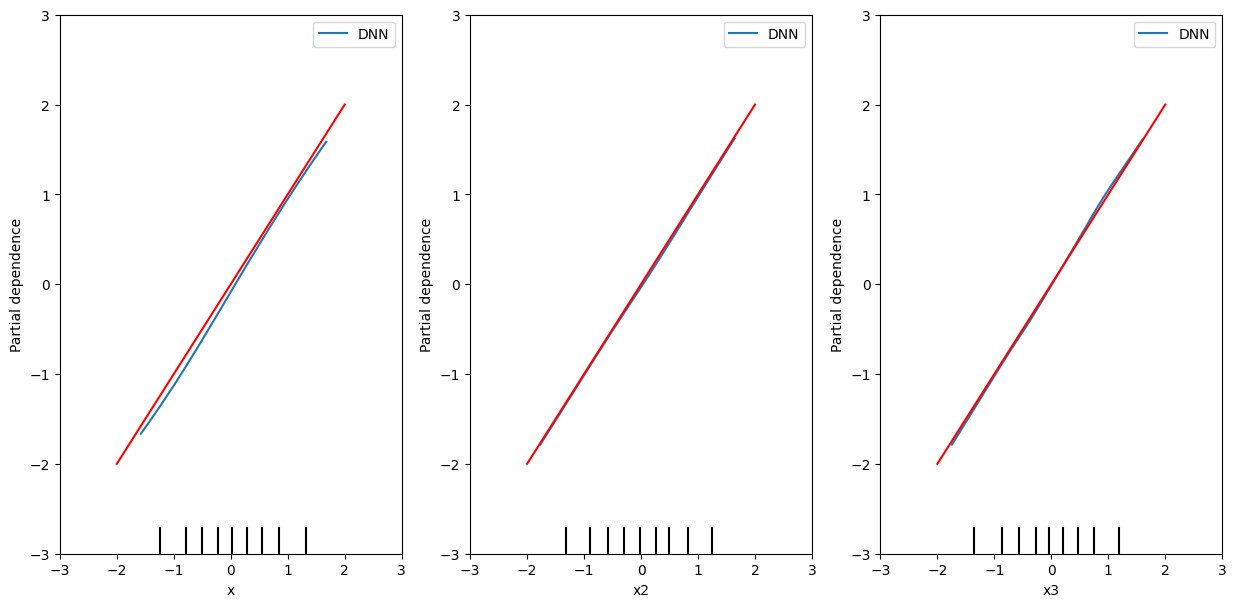

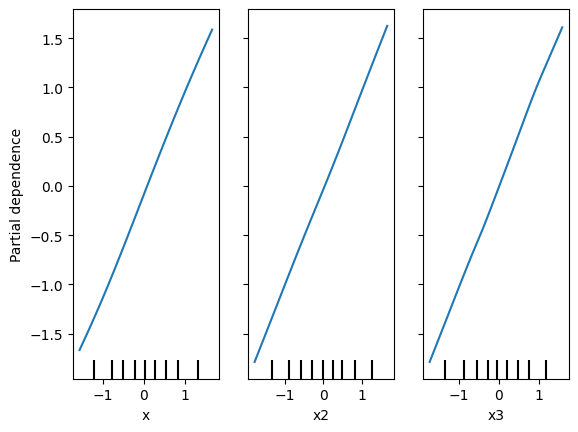

In [8]:
from sklearn.inspection import PartialDependenceDisplay



# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 7))  # (rows, columns, index)
lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2],feature_names=["X1","X2","X3"])
lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "LINEAR REGRESSION"},centered=False)
ax1.set_xlim([-3, 3]) 
ax1.set_ylim([-3, 3]) 
ax2.set_xlim([-3, 3]) 
ax2.set_ylim([-3, 3]) 
ax3.set_xlim([-3, 3]) 
ax3.set_ylim([-3, 3]) 
x_vals = np.linspace(-2, 2, 1000)
ax1.plot(x_vals, x_vals, label='sin(x)', color='red')
ax2.plot(x_vals, x_vals, label='sin(x)', color='red')
ax3.plot(x_vals, x_vals, label='sin(x)', color='red')

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 7))  # (rows, columns, index)
lr_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2],feature_names=["X1","X2","X3"])
lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "XGBoost"},centered=False)
ax1.set_xlim([-3, 3]) 
ax1.set_ylim([-3, 3]) 
ax2.set_xlim([-3, 3]) 
ax2.set_ylim([-3, 3]) 
ax3.set_xlim([-3, 3]) 
ax3.set_ylim([-3, 3]) 
x_vals = np.linspace(-2, 2, 1000)
ax1.plot(x_vals, x_vals, label='sin(x)', color='red')
ax2.plot(x_vals, x_vals, label='sin(x)', color='red')
ax3.plot(x_vals, x_vals, label='sin(x)', color='red')


# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 7))  # (rows, columns, index)
lr_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2],feature_names=["X1","X2","X3"])
lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "Random forest"},centered=False)
ax1.set_xlim([-3, 3]) 
ax1.set_ylim([-3, 3]) 
ax2.set_xlim([-3, 3]) 
ax2.set_ylim([-3, 3]) 
ax3.set_xlim([-3, 3]) 
ax3.set_ylim([-3, 3]) 
x_vals = np.linspace(-2, 2, 1000)
ax1.plot(x_vals, x_vals, label='sin(x)', color='red')
ax2.plot(x_vals, x_vals, label='sin(x)', color='red')
ax3.plot(x_vals, x_vals, label='sin(x)', color='red')

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 7))  # (rows, columns, index)
lr_disp = PartialDependenceDisplay.from_estimator(mlpr_model, X_train, features=[0,1,2],feature_names=["X1","X2","X3"])
lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "DNN"},centered=False)
ax1.set_xlim([-3, 3]) 
ax1.set_ylim([-3, 3]) 
ax2.set_xlim([-3, 3]) 
ax2.set_ylim([-3, 3]) 
ax3.set_xlim([-3, 3]) 
ax3.set_ylim([-3, 3]) 
x_vals = np.linspace(-2, 2, 1000)
ax1.plot(x_vals, x_vals, label='sin(x)', color='red')
ax2.plot(x_vals, x_vals, label='sin(x)', color='red')
ax3.plot(x_vals, x_vals, label='sin(x)', color='red')



base case  : PDP can capture real relation of each feature in the dataset because they are independent.
random forest and XGB seems to be more sensetive to the nois in the data


Simulation 2 : correlated features

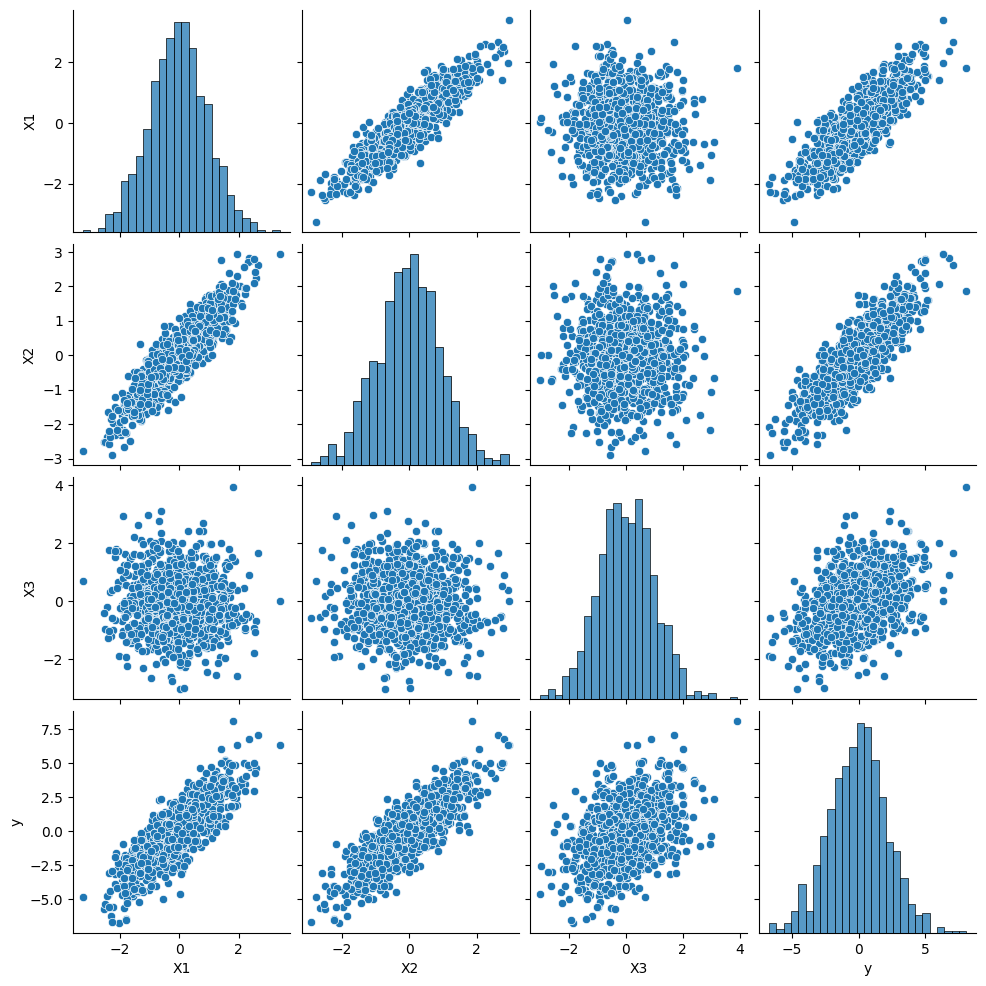

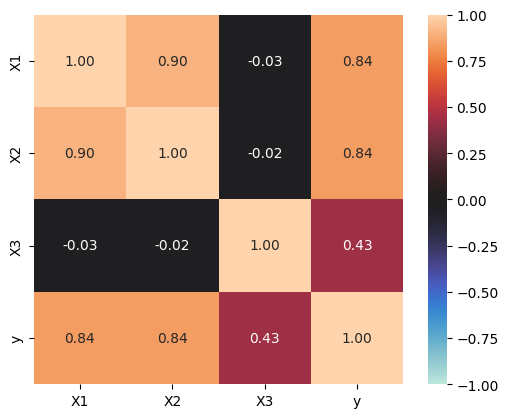

Linear Regression R^2 Score: 0.9389691466477603
Random Forest Regression R^2 Score: 0.9277057188067925
SVM Regression R^2 Score: 0.9388413658413546
XGBoost Regression R^2 Score: 0.9130025035675491


In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Generating synthetic regression data with 3 separate features and noise
np.random.seed(42)
num_samples = 1000

# Generating correlated features (X1 and X2)
mean = [0, 0]
cov = [[1, 0.91], [0.91, 1]]  # Covariance matrix for X1 and X2 with correlation 0.9
X1_X2 = np.random.multivariate_normal(mean, cov, num_samples)
X1 = X1_X2[:, 0]
X2 = X1_X2[:, 1]

# Generating the third independent feature (X3)
X3 = np.random.randn(num_samples)

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.5, num_samples)  # Adding noise
y = X1 + X2 + X3 + noise

# Reshape features to a 2D array
X = np.vstack((X1, X2, X3)).T

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)
mlpr_model = MLPRegressor(hidden_layer_sizes=50,max_iter=1000)
mlpr_model.fit(X_train, y_train)
# Evaluate models
data = pd.DataFrame({"X1":X1,"X2":X2,"X3":X3,"y":y})
sns.pairplot(data)
associations(data)
# Evaluate models
linear_reg_score = linear_reg.score(X_test, y_test)
rf_reg_score = rf_reg.score(X_test, y_test)
svm_reg_score = svm_reg.score(X_test, y_test)
xgb_reg_score = xgb_reg.score(X_test, y_test)

print(f"Linear Regression R^2 Score: {linear_reg_score}")
print(f"Random Forest Regression R^2 Score: {rf_reg_score}")
print(f"SVM Regression R^2 Score: {svm_reg_score}")
print(f"XGBoost Regression R^2 Score: {xgb_reg_score}")


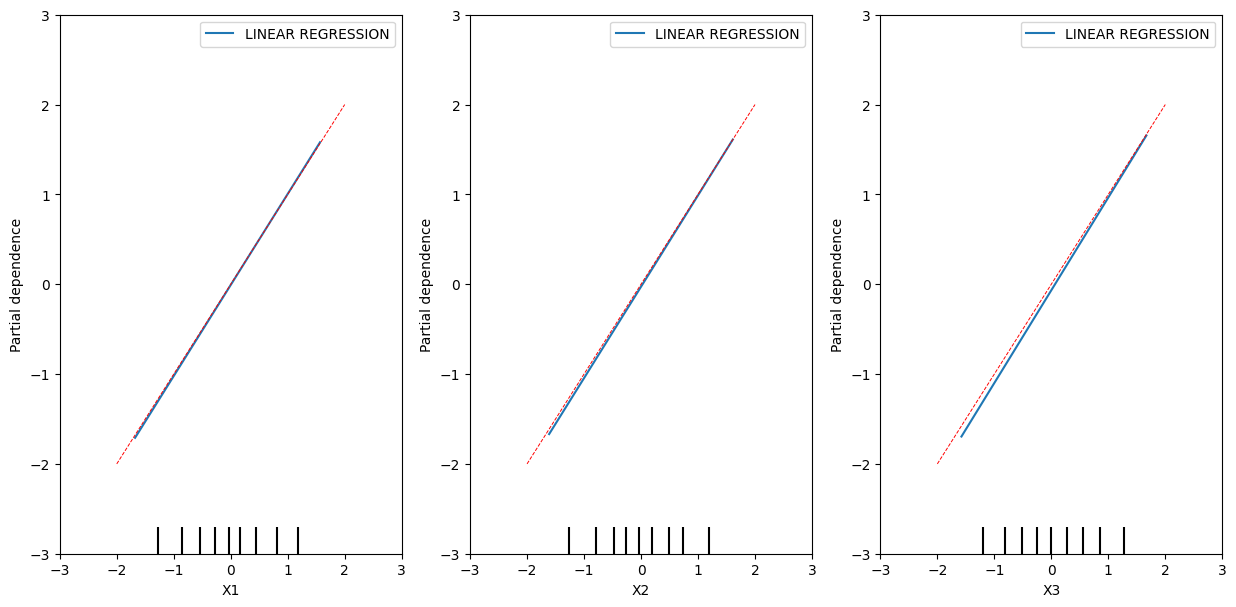

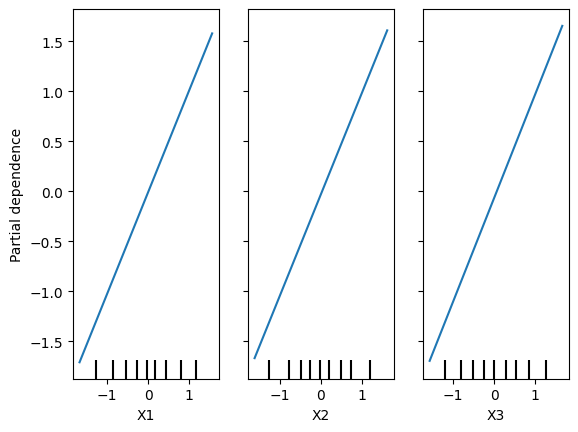

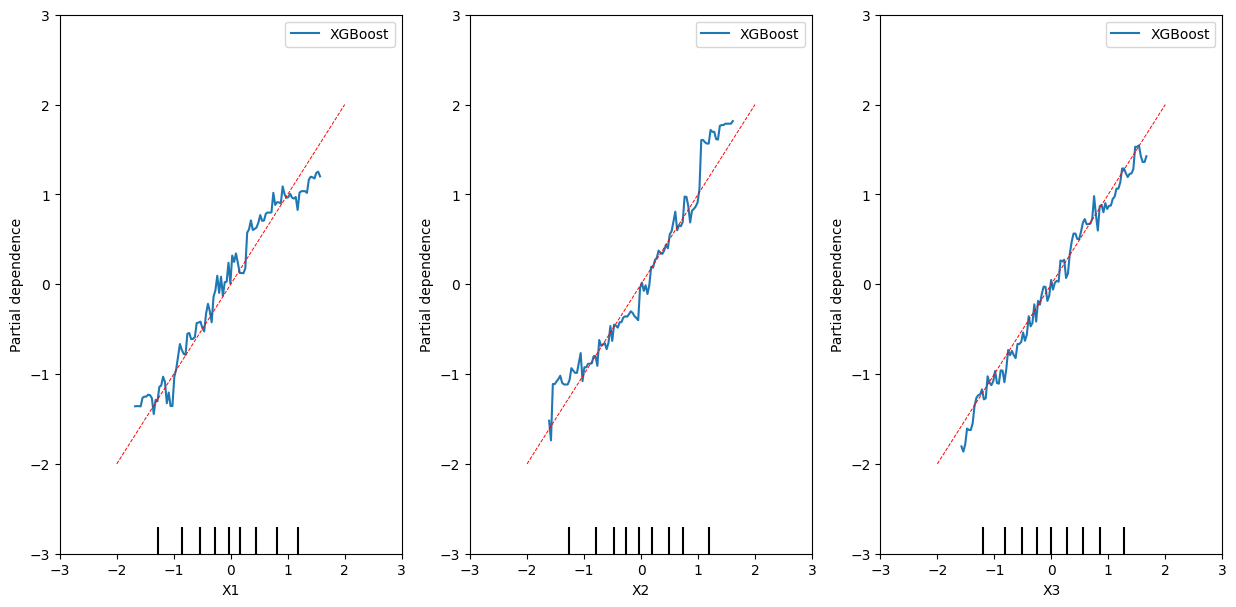

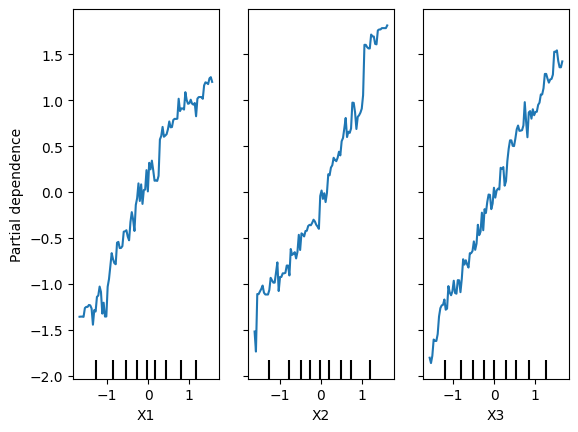

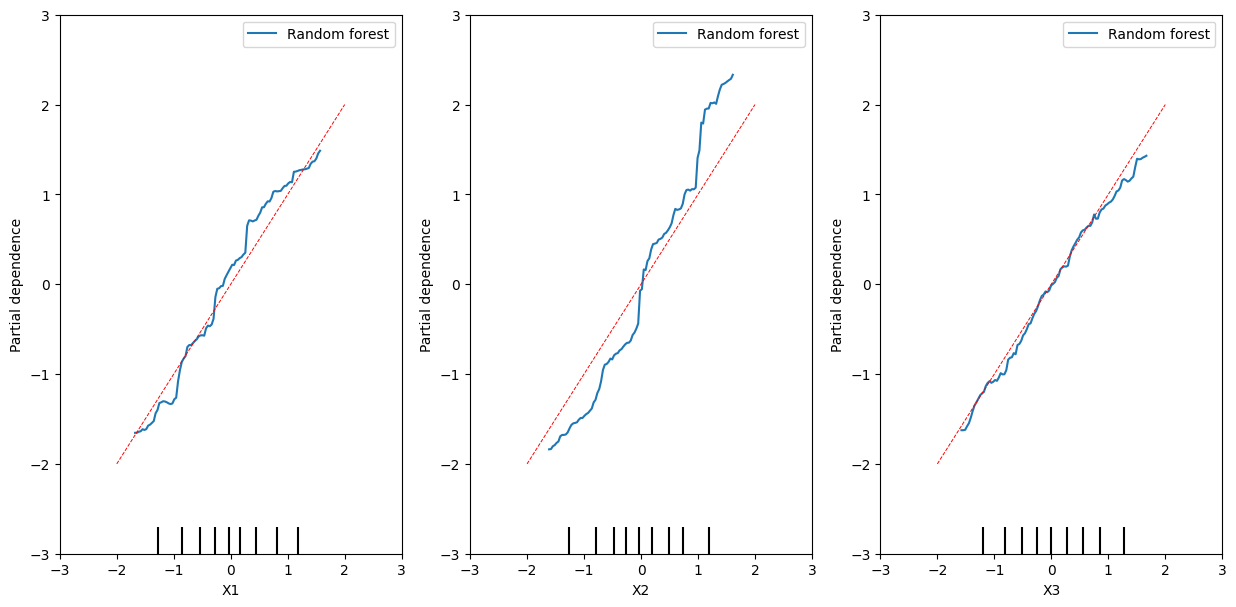

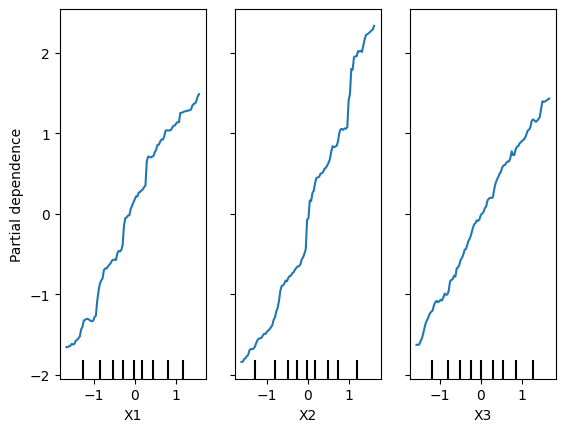

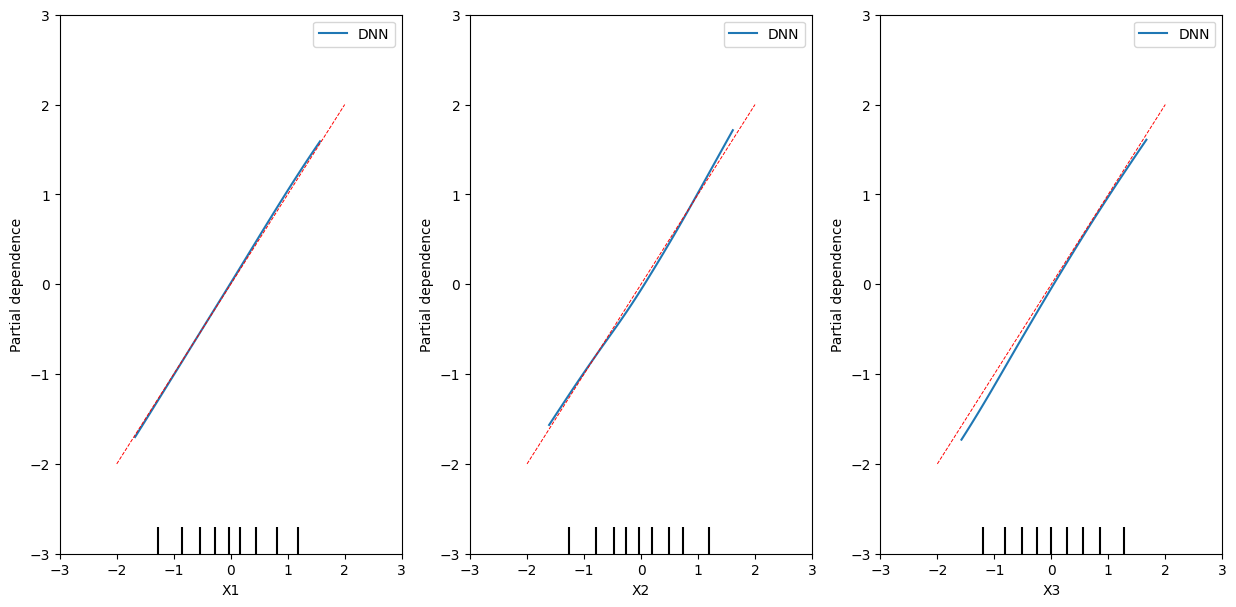

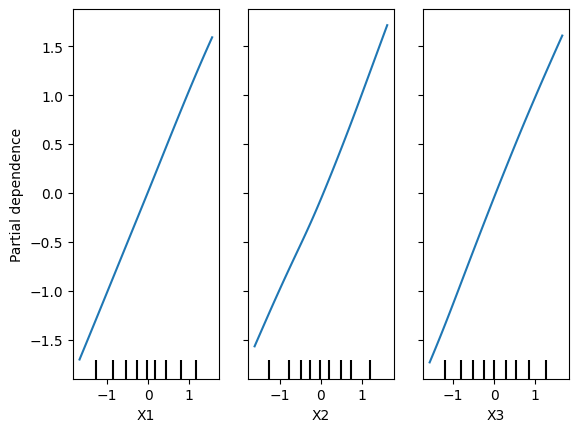

In [27]:
from sklearn.inspection import PartialDependenceDisplay



# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 7))  # (rows, columns, index)
lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2],feature_names=["X1","X2","X3"])
lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "LINEAR REGRESSION"},centered=False)
ax1.set_xlim([-3, 3]) 
ax1.set_ylim([-3, 3]) 
ax2.set_xlim([-3, 3]) 
ax2.set_ylim([-3, 3]) 
ax3.set_xlim([-3, 3]) 
ax3.set_ylim([-3, 3]) 
x_vals = np.linspace(-2, 2, 1000)
ax1.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)
ax2.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)
ax3.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 7))  # (rows, columns, index)
lr_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2],feature_names=["X1","X2","X3"])
lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "XGBoost"},centered=False)
ax1.set_xlim([-3, 3]) 
ax1.set_ylim([-3, 3]) 
ax2.set_xlim([-3, 3]) 
ax2.set_ylim([-3, 3]) 
ax3.set_xlim([-3, 3]) 
ax3.set_ylim([-3, 3]) 
x_vals = np.linspace(-2, 2, 1000)
ax1.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)
ax2.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)
ax3.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)


# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 7))  # (rows, columns, index)
lr_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2],feature_names=["X1","X2","X3"])
lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "Random forest"},centered=False)
ax1.set_xlim([-3, 3]) 
ax1.set_ylim([-3, 3]) 
ax2.set_xlim([-3, 3]) 
ax2.set_ylim([-3, 3]) 
ax3.set_xlim([-3, 3]) 
ax3.set_ylim([-3, 3]) 
x_vals = np.linspace(-2, 2, 1000)
ax1.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)
ax2.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)
ax3.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 7))  # (rows, columns, index)
lr_disp = PartialDependenceDisplay.from_estimator(mlpr_model, X_train, features=[0,1,2],feature_names=["X1","X2","X3"])
lr_disp.plot(ax=[ax1, ax2,ax3], line_kw={"label": "DNN"},centered=False)
ax1.set_xlim([-3, 3]) 
ax1.set_ylim([-3, 3]) 
ax2.set_xlim([-3, 3]) 
ax2.set_ylim([-3, 3]) 
ax3.set_xlim([-3, 3]) 
ax3.set_ylim([-3, 3]) 
x_vals = np.linspace(-2, 2, 1000)
ax1.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)
ax2.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)
ax3.plot(x_vals, x_vals, label='X1',color='red', linestyle='dashed',linewidth=0.7)



case 2 : in presence of correlate feature in linear regression and dnn show more smooth shape for the correlated feature 
In simulated experiments where linear correlations exist among features, the performance divergence between tree-based models like Random Forests (RF) and XGBoost (XGB) versus Multilayer Perceptrons (MLPs) can be delineated by their aptitude in capturing linear relationships.

In scenarios where the relationship among features follows a linear pattern (e.g., X1 + X2 + X3 + noise), tree-based models such as RF and XGB outperform MLPs due to their inherent capacity to discern and utilize linear correlations. These models leverage decision trees to partition the feature space, effectively capturing linear relationships among correlated features. Consequently, when confronted with correlated features like X1, X2, and X3, tree-based models construct splits that correspond to these correlations, enabling the approximation of linear relationships within the data.

Conversely, MLPs, characterized by their neural network architecture, are more inclined to learn complex and non-linear patterns. In scenarios with linear correlations, MLPs might represent these relationships in higher-level abstractions, resulting in smoother Partial Dependence Plots (PDPs) for correlated features. This smoothness might indicate the model's abstraction of linear relationships rather than explicit capture, leading to a perception of reduced fidelity in depicting linear correlations compared to tree-based models.

However, it's important to consider that while tree-based models excel in capturing linear relations, they may lack the capability to represent intricate non-linear patterns. MLPs, with their ability to capture complex relationships, might offer better representation of non-linear structures but potentially display smoother PDPs for linear correlations.

Simulation 3 : dependent features

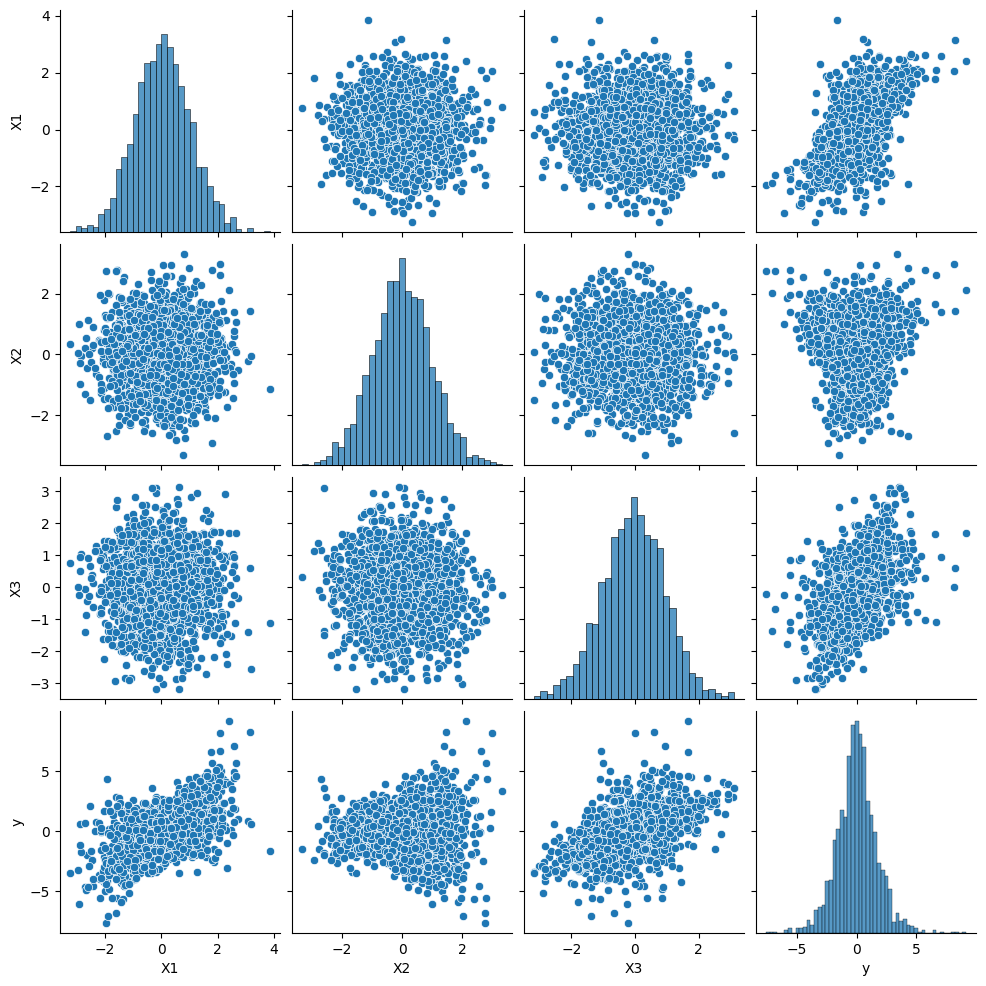

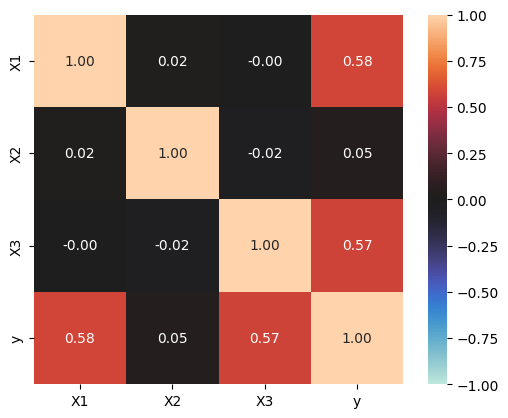

Linear Regression R^2 Score: 0.7176692912641944
Random Forest Regression R^2 Score: 0.9705096531306103
SVM Regression R^2 Score: 0.7175002787954508
XGBoost Regression R^2 Score: 0.974590842351194


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Generating synthetic regression data with dependent features and noise
np.random.seed(42)
num_samples = 2000

# Generating feature X1
X1 = np.random.randn(num_samples)

# Making X2 dependent on X1 with added noise
# X2 = a * X1 + b + noise
a = 0.8  # Coefficient for X1 in generating X2
b = 0.5  # Intercept for generating X2
# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.1, num_samples)  # Adding noise
X2_t = X1*X2

# Generating the third independent feature (X3)
X3 = np.random.randn(num_samples)


y = X1 + X2_t + X3 + noise

# Reshape features to a 2D array
X = np.vstack((X1, X2, X3)).T

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)

# Evaluate models
linear_reg_score = linear_reg.score(X_test, y_test)
rf_reg_score = rf_reg.score(X_test, y_test)
svm_reg_score = svm_reg.score(X_test, y_test)
xgb_reg_score = xgb_reg.score(X_test, y_test)

data = pd.DataFrame({"X1":X1,"X2":X2,"X3":X3,"y":y})
sns.pairplot(data)
associations(data)
print(f"Linear Regression R^2 Score: {linear_reg_score}")
print(f"Random Forest Regression R^2 Score: {rf_reg_score}")
print(f"SVM Regression R^2 Score: {svm_reg_score}")
print(f"XGBoost Regression R^2 Score: {xgb_reg_score}")


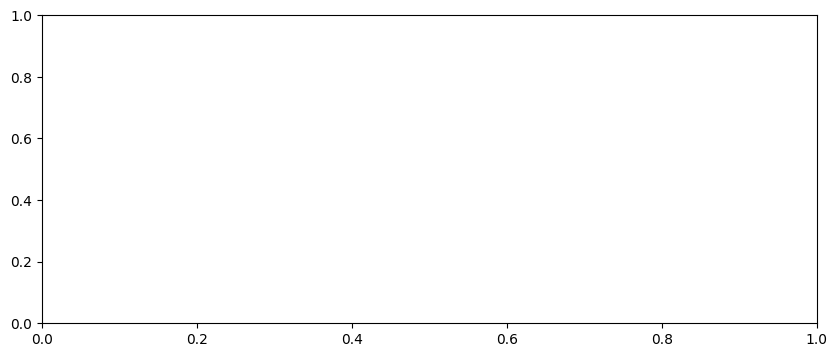

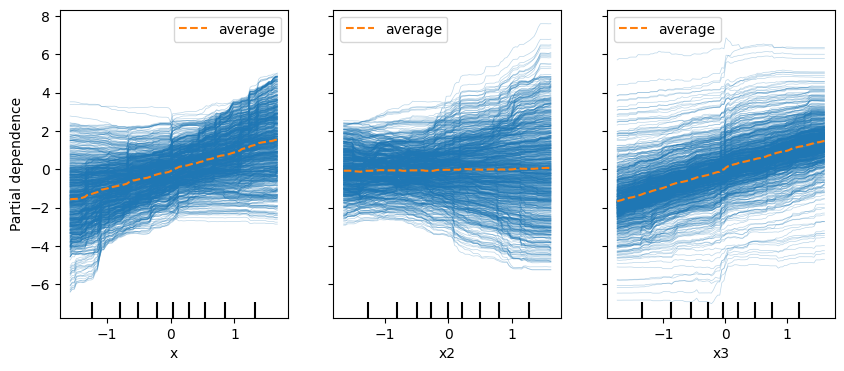

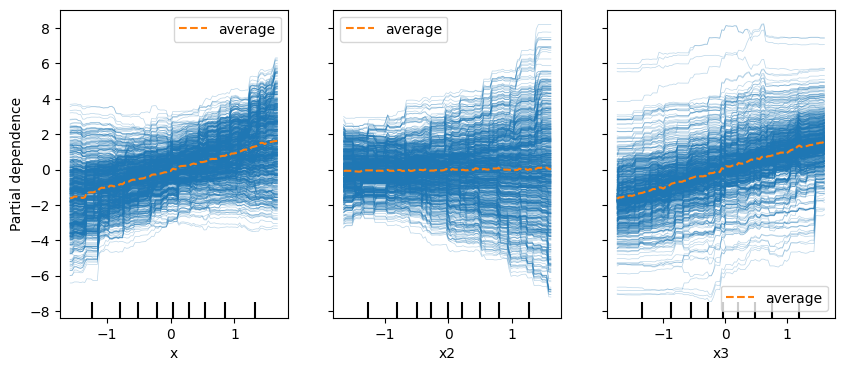

In [30]:
from sklearn.inspection import PartialDependenceDisplay


plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 1, 1)  # (rows, columns, indexdisp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax,kind="both")

plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax,kind="both")
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax,kind="both")

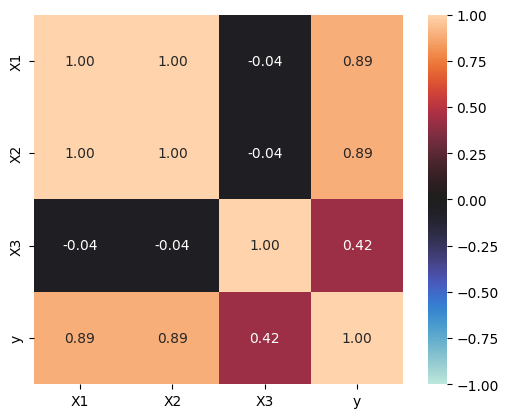

Linear Regression R^2 Score: 1.0
Random Forest Regression R^2 Score: 0.9841079874956465
SVM Regression R^2 Score: 0.9997001665387854
XGBoost Regression R^2 Score: 0.9860580944786043


In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import pandas as pd
from dython.nominal import associations  # correlation calculation

# Generating synthetic regression data with dependent features and noise
np.random.seed(42)
num_samples = 1000

X1 = np.random.randn(num_samples)
X2 = X1.copy()
X3 = np.random.randn(num_samples)




y = X1 + X2 + X3 

# Reshape features to a 2D array
X = np.vstack((X1, X2, X3)).T

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)
mlpr_model = MLPRegressor(hidden_layer_sizes=50,max_iter=1000)
mlpr_model.fit(X_train, y_train)
# Evaluate models
linear_reg_score = linear_reg.score(X_test, y_test)
rf_reg_score = rf_reg.score(X_test, y_test)
svm_reg_score = svm_reg.score(X_test, y_test)
xgb_reg_score = xgb_reg.score(X_test, y_test)

data = pd.DataFrame({"X1":X1,"X2":X2,"X3":X3,"y":y})
associations(data)
print(f"Linear Regression R^2 Score: {linear_reg_score}")
print(f"Random Forest Regression R^2 Score: {rf_reg_score}")
print(f"SVM Regression R^2 Score: {svm_reg_score}")
print(f"XGBoost Regression R^2 Score: {xgb_reg_score}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

<Figure size 2000x400 with 0 Axes>

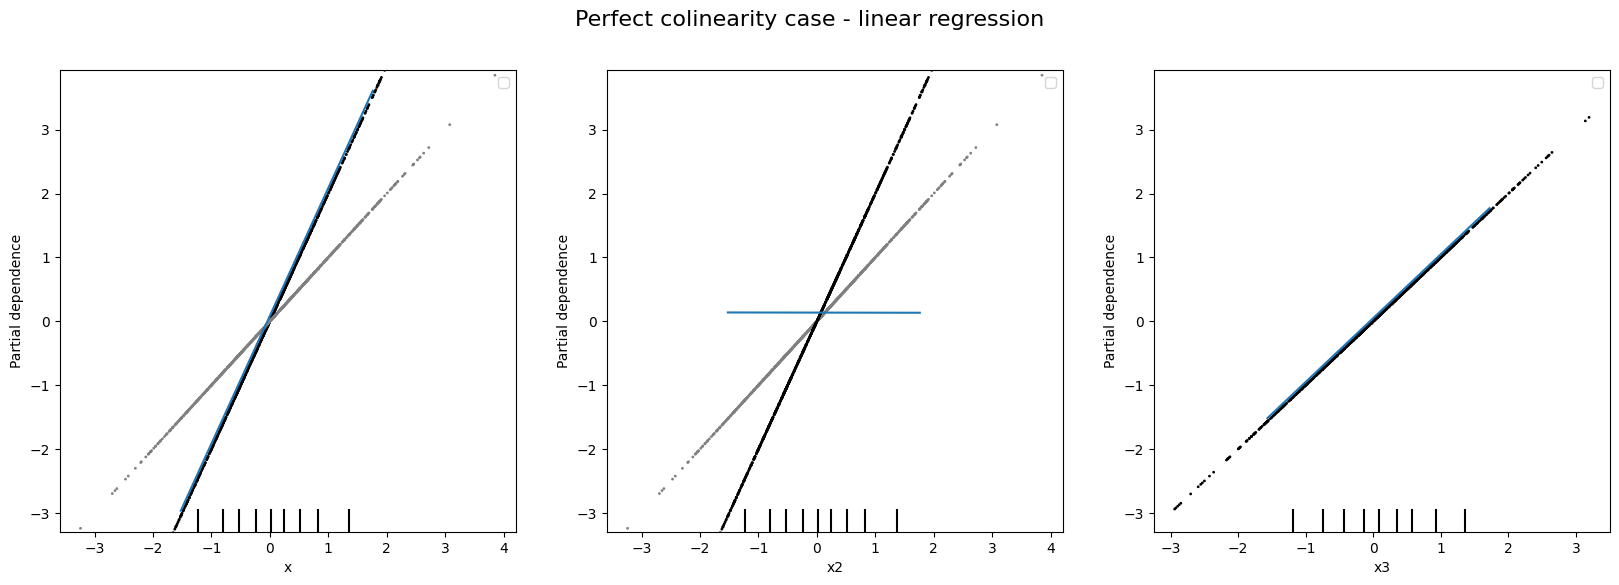

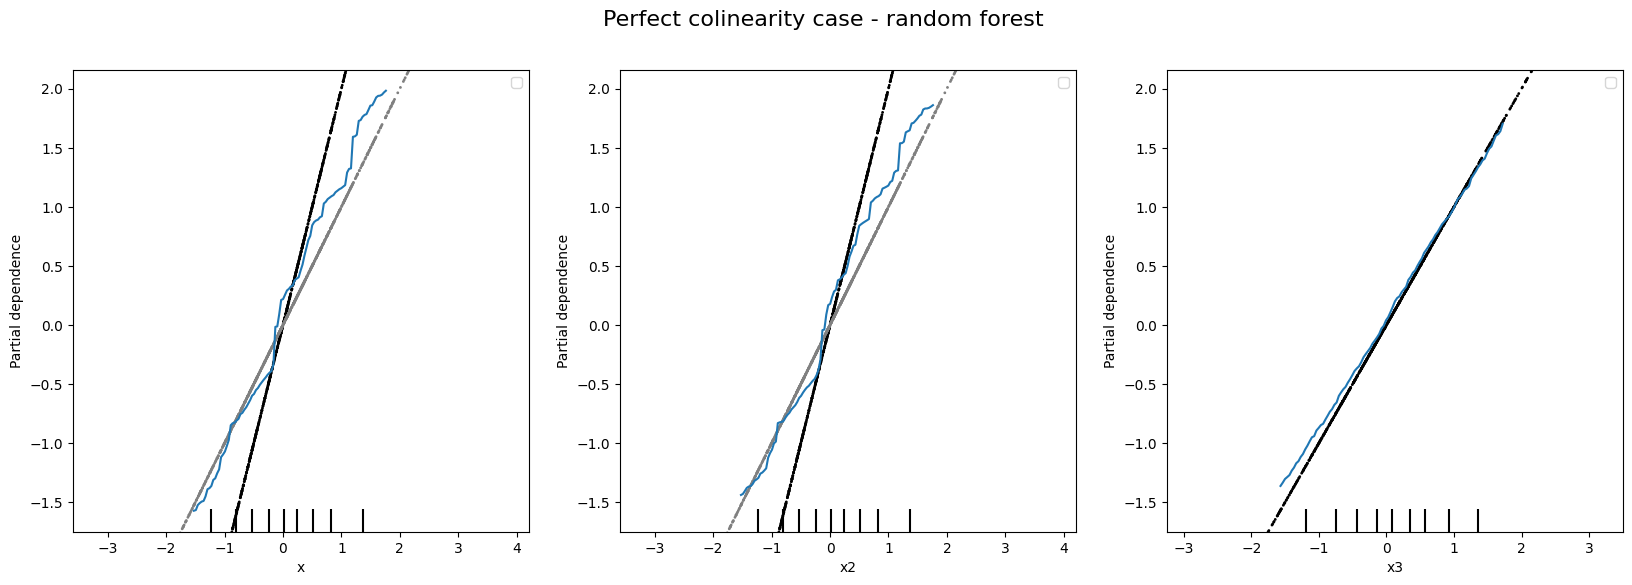

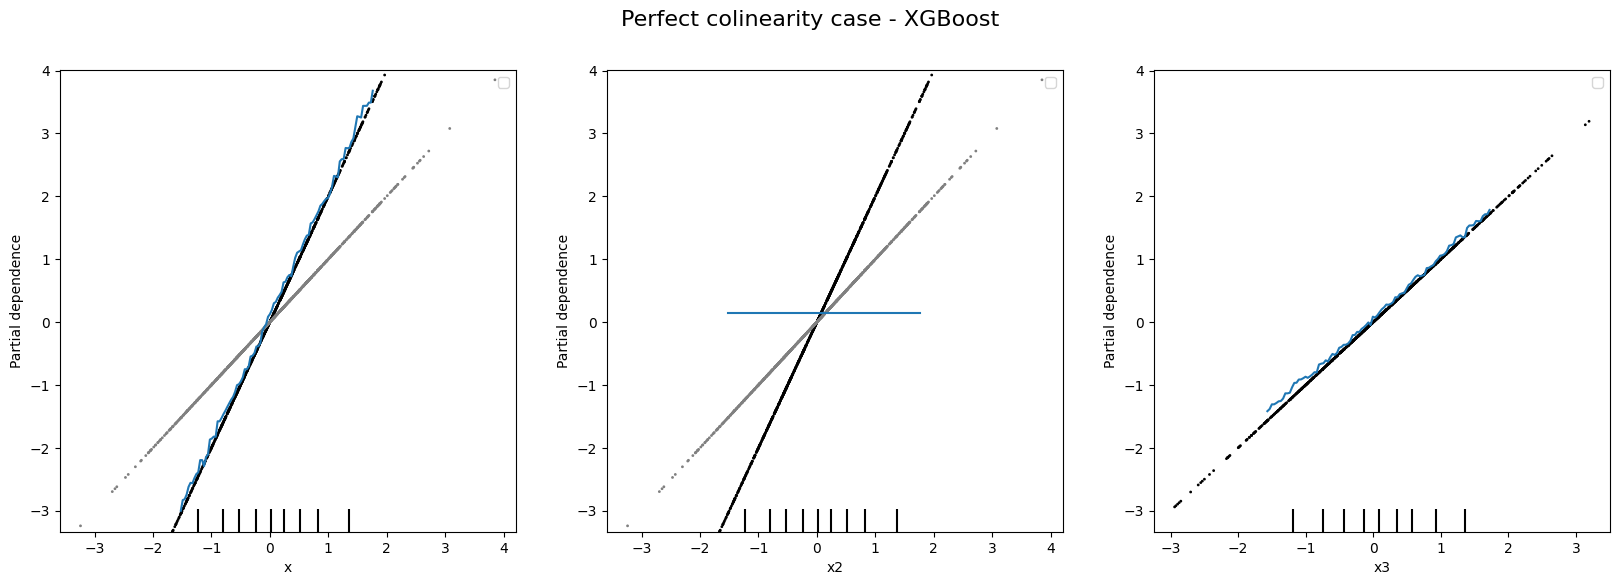

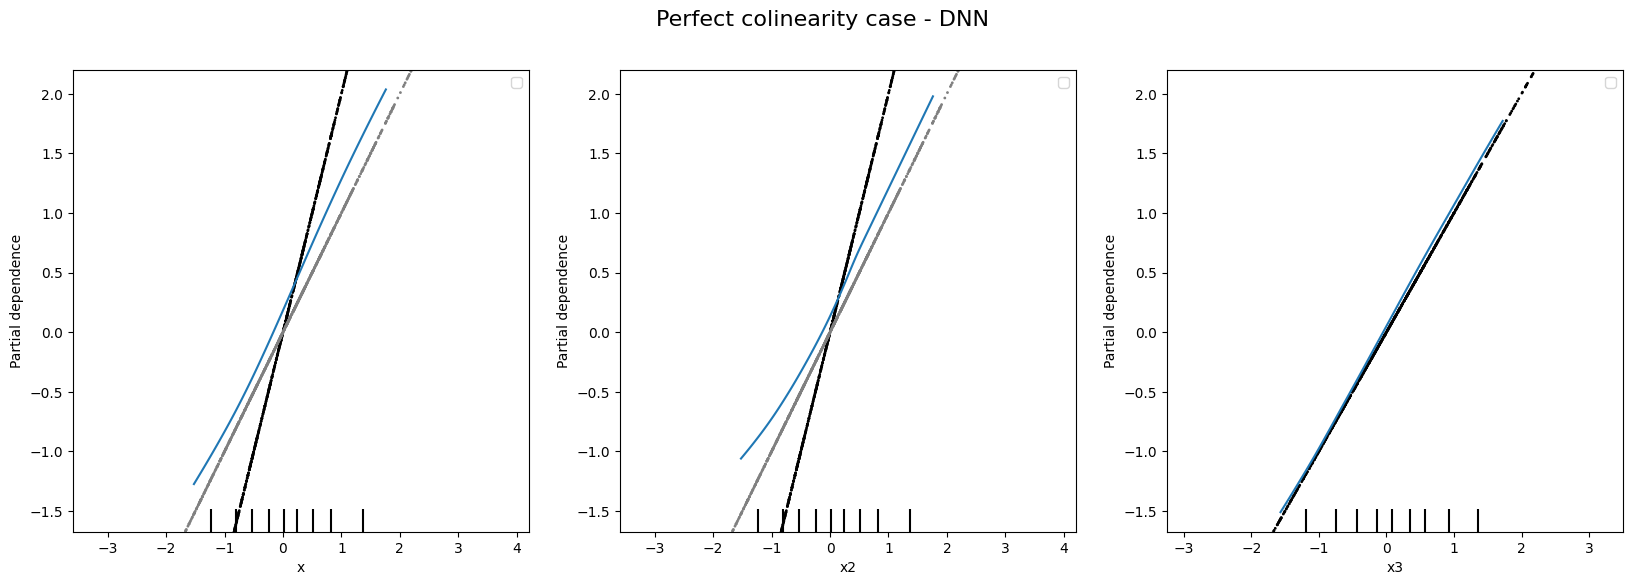

In [32]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pylab as plt

plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
ax1.scatter(X1, 2*X1,linestyle='dashed',s=1,c=["black"])
ax1.scatter(X1, X1,linestyle='dashed',s=1,c=["grey"])
ax2.scatter(X1, X1, linestyle='dashed',s=1,c=["grey"])
ax2.scatter(X1, 2*X1,linestyle='dashed',s=1,c=["black"])
ax3.scatter(X3, X3, linestyle='dashed',s=1,c=["black"])
fig.suptitle('Perfect colinearity case - linear regression', fontsize=16)
ax1.legend()
ax2.legend()
ax3.legend()

fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
ax1.scatter(X1, 2*X1,linestyle='dashed',s=1,c=["black"])
ax1.scatter(X1, X1,linestyle='dashed',s=1,c=["grey"])
ax2.scatter(X1, 2*X1, linestyle='dashed',s=1,c=["black"])
ax2.scatter(X1, X1, linestyle='dashed',s=1,c=["grey"])
ax3.scatter(X3, X3, linestyle='dashed',s=1,c=["black"])
fig.suptitle('Perfect colinearity case - random forest', fontsize=16)
ax1.legend()
ax2.legend()
ax3.legend()
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
ax1.scatter(X1, 2*X1,linestyle='dashed',s=1,c=["black"])
ax1.scatter(X1, X1,linestyle='dashed',s=1,c=["grey"])
ax2.scatter(X1, 2*X1, linestyle='dashed',s=1,c=["black"])
ax2.scatter(X1, X1, linestyle='dashed',s=1,c=["grey"])
ax3.scatter(X3, X3, linestyle='dashed',s=1,c=["black"])
fig.suptitle('Perfect colinearity case - XGBoost', fontsize=16)
ax1.legend()
ax2.legend()
ax3.legend()
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(mlpr_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
ax1.scatter(X1, 2*X1,linestyle='dashed',s=1,c=["black"])
ax1.scatter(X1, X1,linestyle='dashed',s=1,c=["grey"])
ax2.scatter(X1, 2*X1, linestyle='dashed',s=1,c=["black"])
ax2.scatter(X1, X1, linestyle='dashed',s=1,c=["grey"])
ax3.scatter(X3, X3, linestyle='dashed',s=1,c=["black"])
fig.suptitle('Perfect colinearity case - DNN', fontsize=16)
ax1.legend()
ax2.legend()
ax3.legend()


Simulation 4 : outliers effect

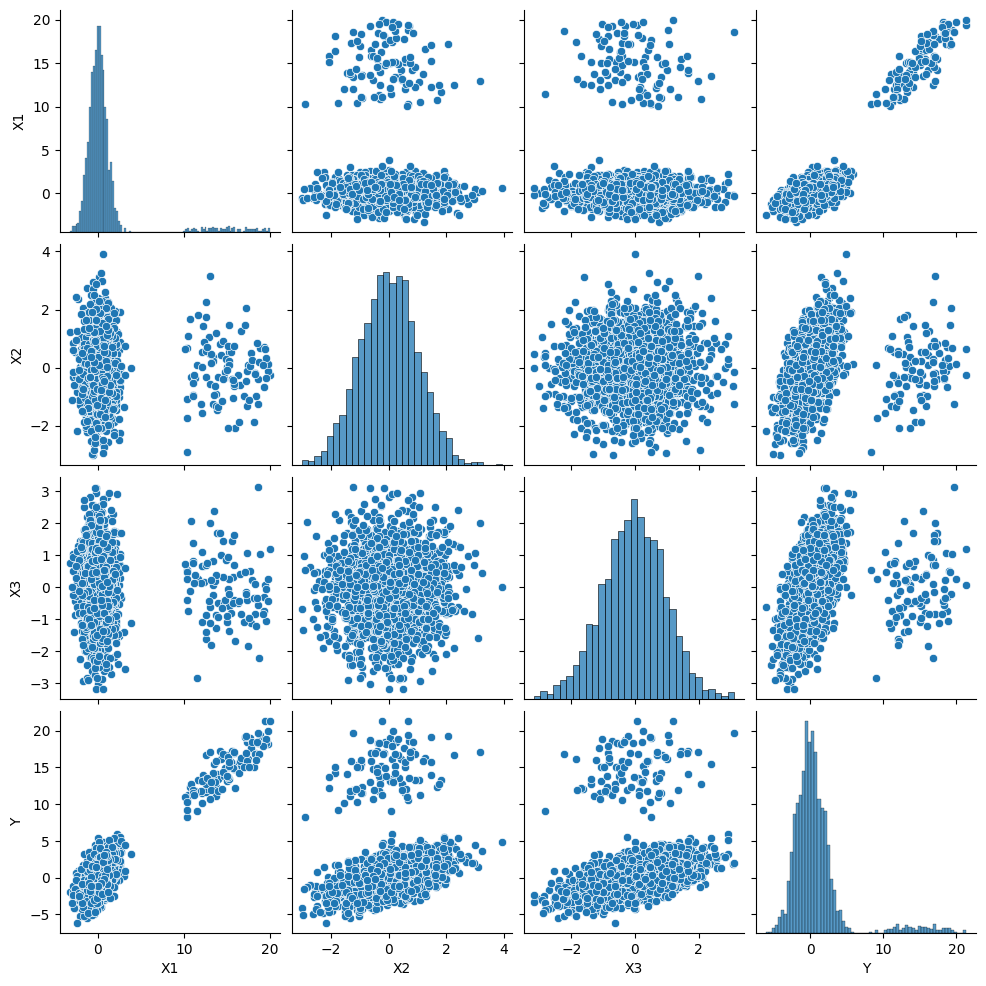

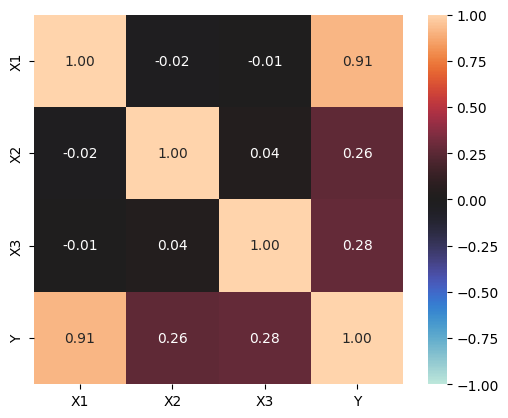

Linear Regression R^2 Score: 0.9763667750233229
Random Forest Regression R^2 Score: 0.9643724225951524
SVM Regression R^2 Score: 0.9763298267562336
XGBoost Regression R^2 Score: 0.9592177646594107


In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Generating synthetic regression data with 3 features and outliers
np.random.seed(42)
num_samples = 2000

# Generating features X1, X2, and X3
X1 = np.random.randn(num_samples)
X2 = np.random.randn(num_samples)
X3 = np.random.randn(num_samples)

# Introducing outliers in X1 (replace 20 samples with outliers)
num_outliers = 100
outliers_indices = np.random.choice(num_samples, num_outliers, replace=False)
X1[outliers_indices] = np.random.uniform(10, 20, num_outliers)  # Assigning outliers to X1

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.5, num_samples)  # Adding noise
y = X1 + X2 + X3 + noise

# Reshape features to a 2D array
X = np.vstack((X1, X2, X3)).T

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)

# Evaluate models
linear_reg_score = linear_reg.score(X_test, y_test)
rf_reg_score = rf_reg.score(X_test, y_test)
svm_reg_score = svm_reg.score(X_test, y_test)
xgb_reg_score = xgb_reg.score(X_test, y_test)

data = pd.DataFrame({"X1":X1,"X2":X2,"X3":X3,"Y":y})
sns.pairplot(data)
associations(data)
print(f"Linear Regression R^2 Score: {linear_reg_score}")
print(f"Random Forest Regression R^2 Score: {rf_reg_score}")
print(f"SVM Regression R^2 Score: {svm_reg_score}")
print(f"XGBoost Regression R^2 Score: {xgb_reg_score}")


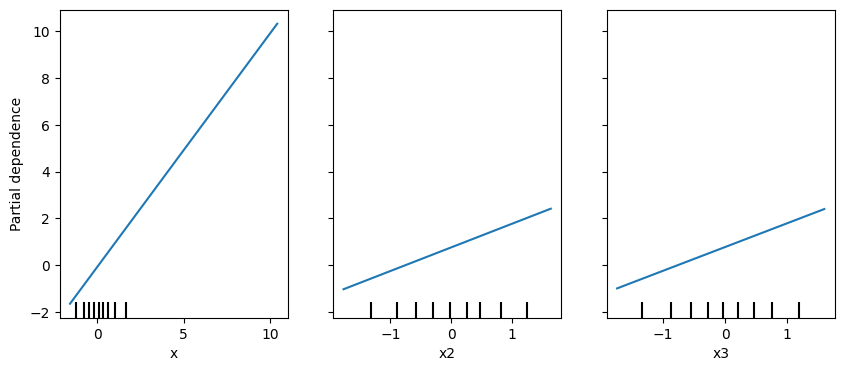

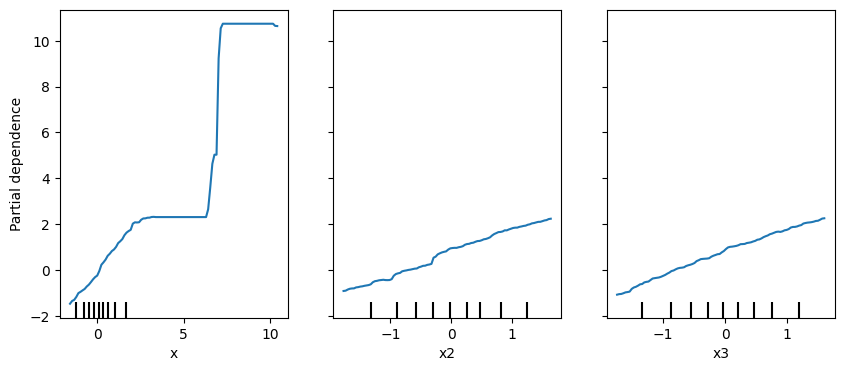

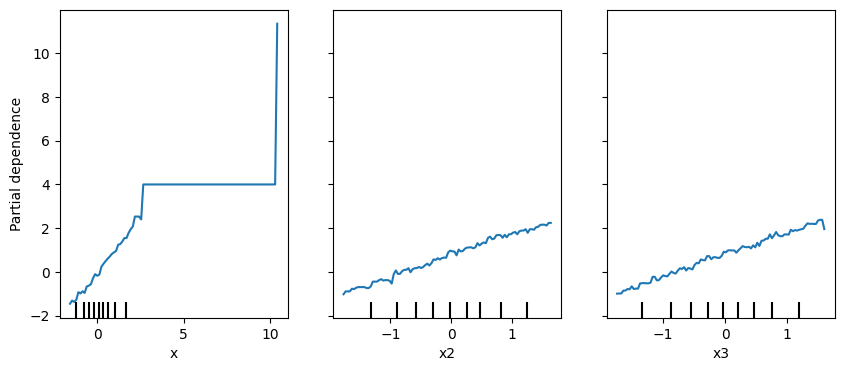

In [34]:
from sklearn.inspection import PartialDependenceDisplay


plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax,grid_resolution=200)

plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax)
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=ax)

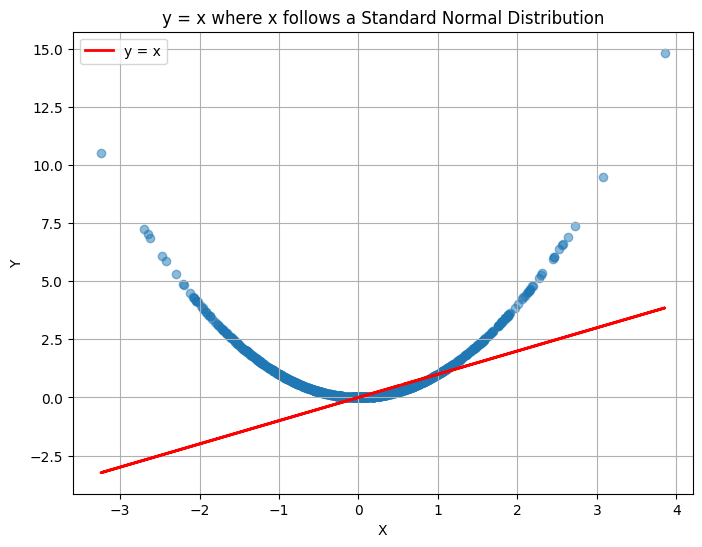

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Generating data where y = x and x follows a standard normal distribution
np.random.seed(42)
x = np.random.randn(1000)  # Generating 1000 random values for x following a standard normal distribution
y = x**2  # y is directly proportional to x

# Creating a scatter plot of y against x
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, x, color='red', label='y = x', linewidth=2)  # Plotting the line y = x
plt.title('y = x where x follows a Standard Normal Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


Simulation 5 : non linear features

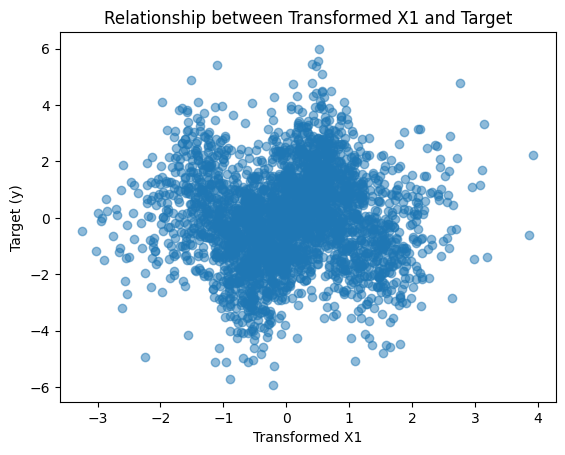

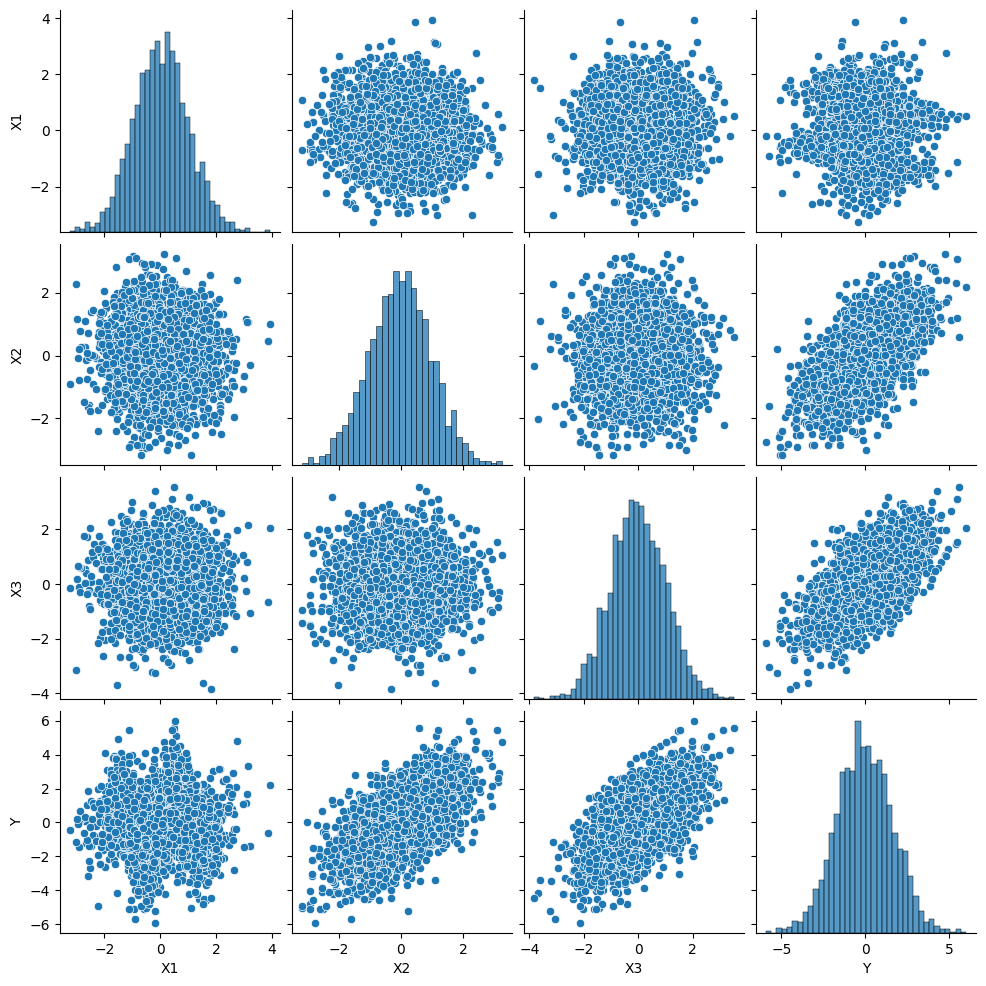

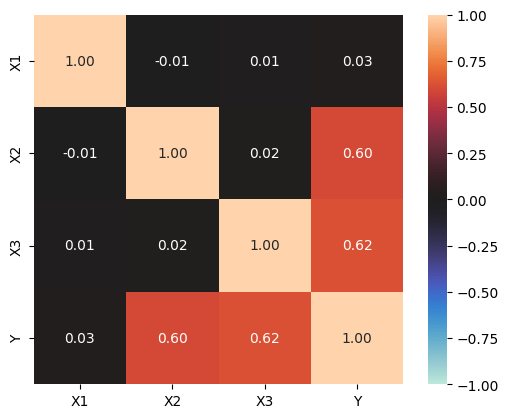

Linear Regression R^2 Score: 0.7561448425544164
Random Forest Regression R^2 Score: 0.8933388428123077
SVM Regression R^2 Score: 0.8812120194736535
XGBoost Regression R^2 Score: 0.8766810507604562


In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Generating synthetic regression data with 3 features and non-linearity in X1
np.random.seed(42)
num_samples = 3000

# Generating features X1, X2, and X3
X1 = np.random.randn(num_samples)
X2 = np.random.randn(num_samples)
X3 = np.random.randn(num_samples)

# Introducing non-linearity in X1 (squaring X1)
X1_t = np.sin(3*X1)

# Target variable (y) as the sum of features plus noise
noise = np.random.normal(0, 0.5, num_samples)  # Adding noise
y = X1_t + X2 + X3 + noise

# Reshape features to a 2D array
X = np.vstack((X1, X2, X3)).T
# Plotting X1_transformed against y
plt.scatter(X1, y, alpha=0.5)
plt.xlabel('Transformed X1')
plt.ylabel('Target (y)')
plt.title('Relationship between Transformed X1 and Target')
plt.show()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting different regression models
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Support Vector Machine Regression
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)

# XGBoost Regression
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)

# XGBoost Regression
mlpr_model = MLPRegressor(hidden_layer_sizes=50,max_iter=1000)
mlpr_model.fit(X_train, y_train)
# Evaluate models
linear_reg_score = linear_reg.score(X_test, y_test)
rf_reg_score = rf_reg.score(X_test, y_test)
svm_reg_score = svm_reg.score(X_test, y_test)
xgb_reg_score = xgb_reg.score(X_test, y_test)
data = pd.DataFrame({"X1":X1,"X2":X2,"X3":X3,"Y":y})
sns.pairplot(data)
associations(data)
print(f"Linear Regression R^2 Score: {linear_reg_score}")
print(f"Random Forest Regression R^2 Score: {rf_reg_score}")
print(f"SVM Regression R^2 Score: {svm_reg_score}")
print(f"XGBoost Regression R^2 Score: {xgb_reg_score}")


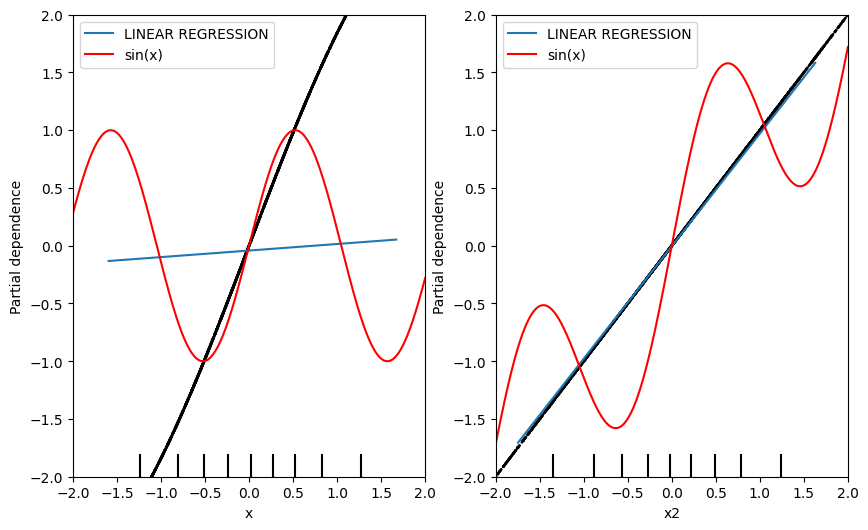

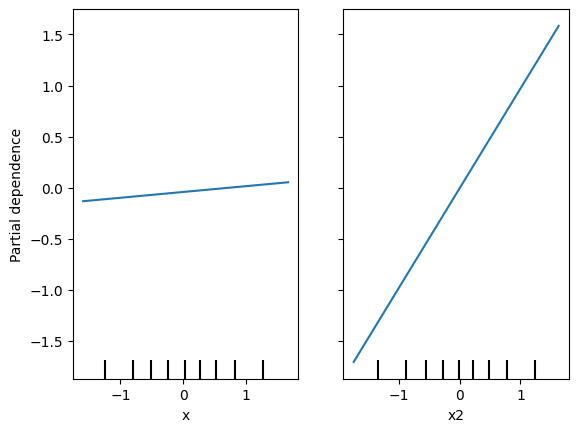

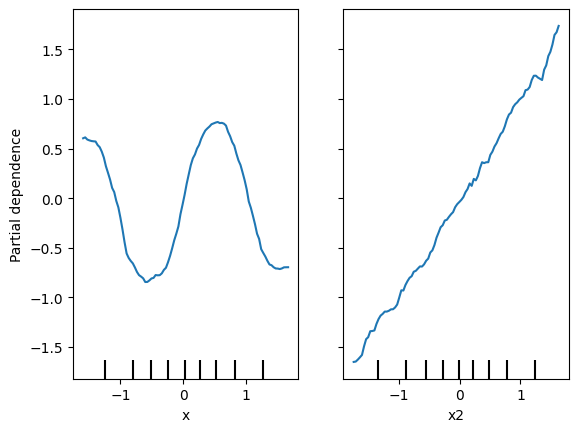

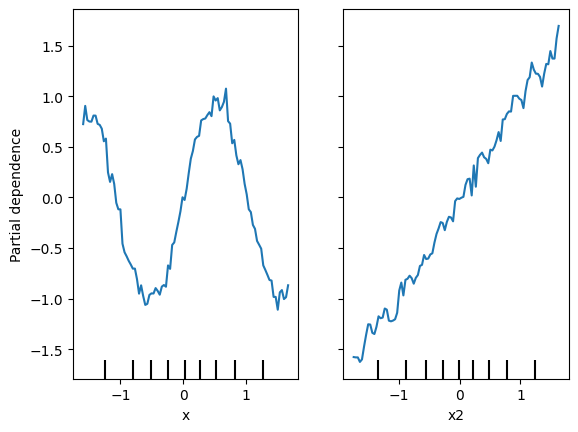

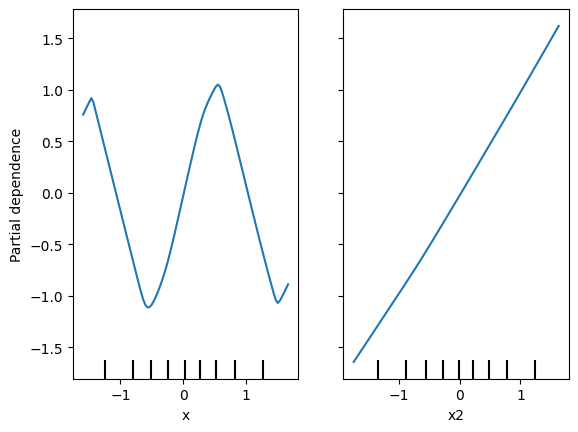

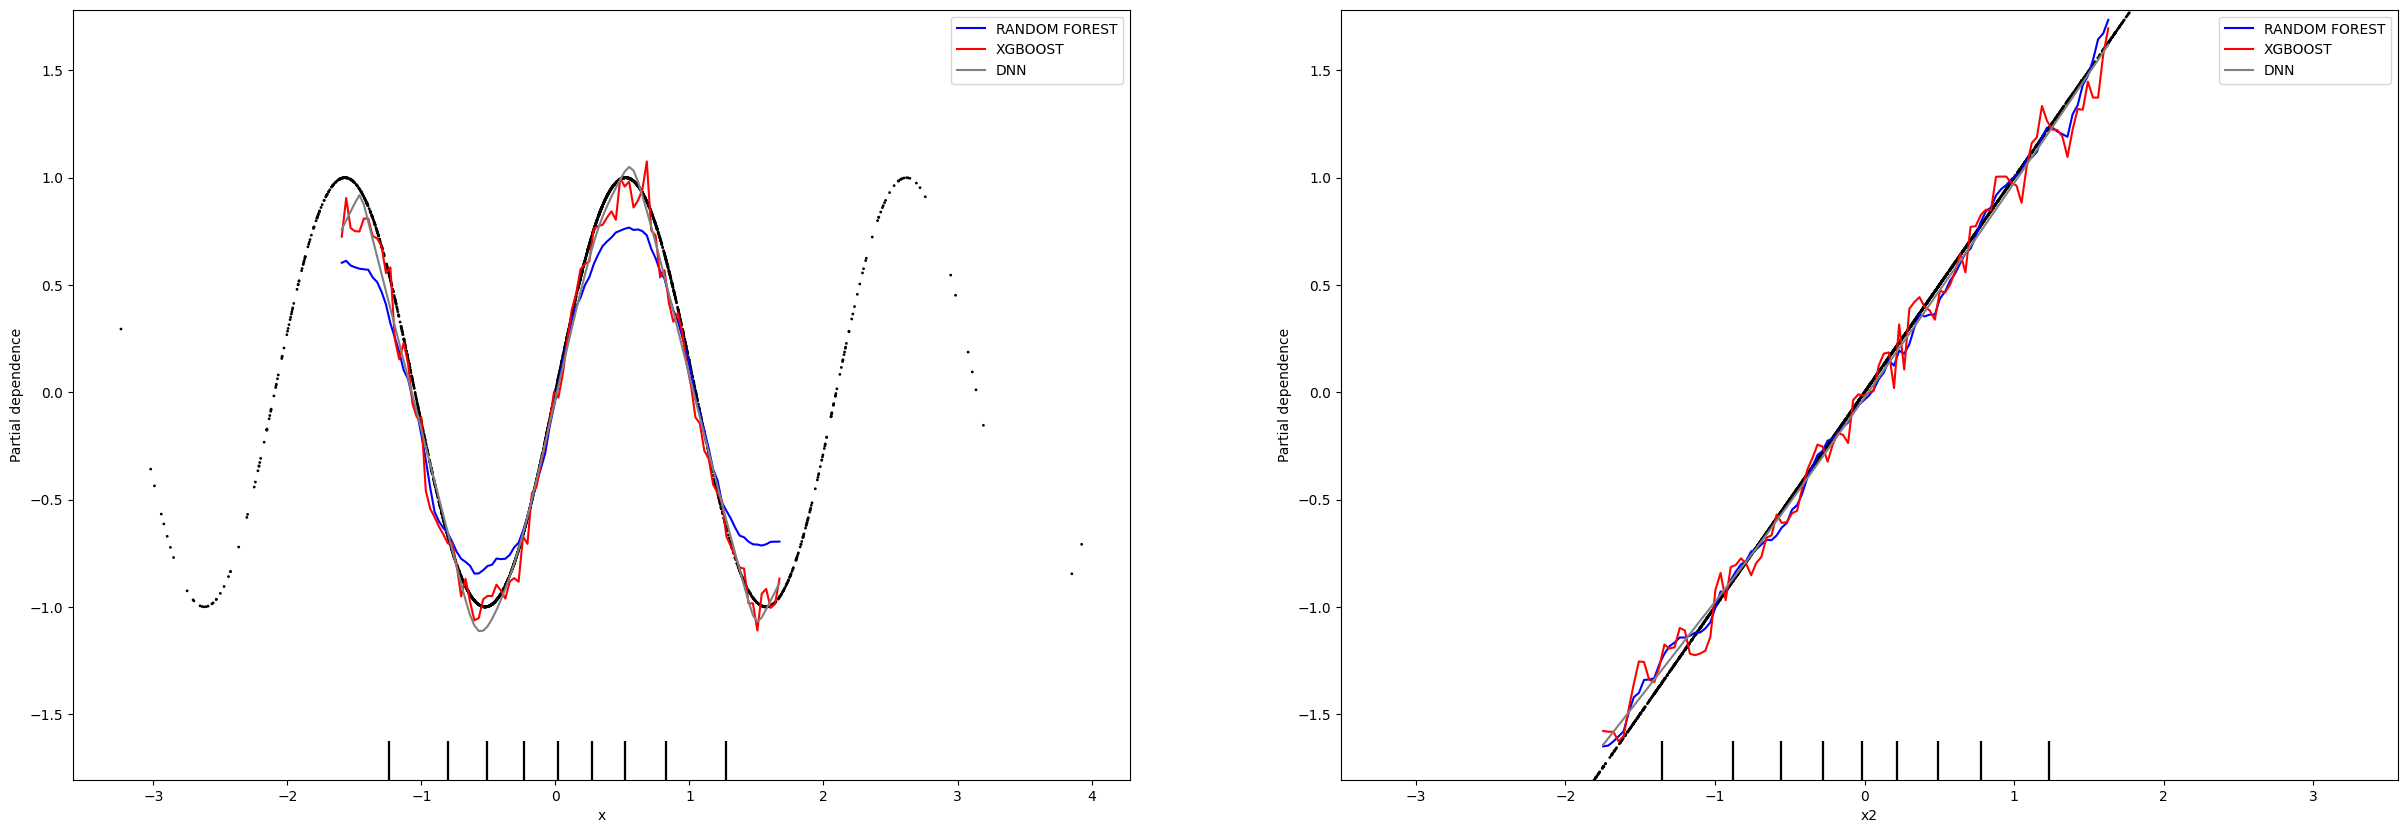

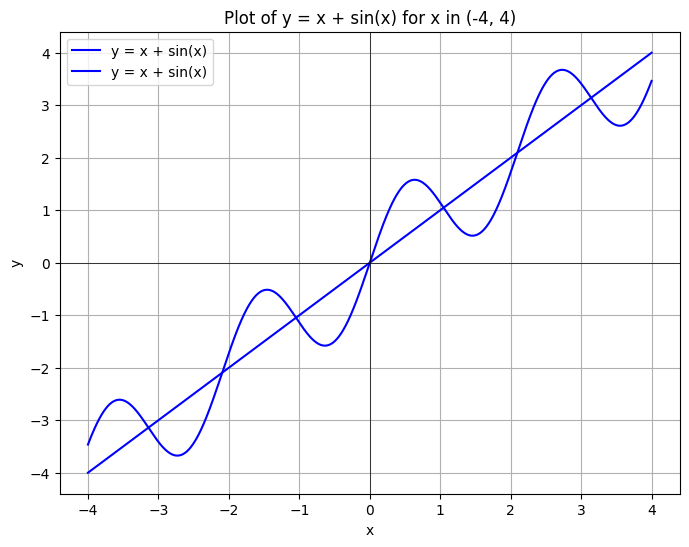

In [77]:
from sklearn.inspection import PartialDependenceDisplay


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))


lr_disp = PartialDependenceDisplay.from_estimator(linear_reg, X_train, features=[0,1],feature_names=["x","x2"])

rf_disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=[0,1],feature_names=["x","x2"])

xgb_disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1],feature_names=["x","x2"])
mlp_disp = PartialDependenceDisplay.from_estimator(mlpr_model, X_train, features=[0,1],feature_names=["x","x2"])


lr_disp.plot(ax=[ax1, ax2], line_kw={"label": "LINEAR REGRESSION"},centered=False)
ax1.set_xlim([-2, 2]) 
ax1.set_ylim([-2, 2]) 
ax2.set_xlim([-2, 2]) 
ax2.set_ylim([-2, 2]) 
x_vals = np.linspace(-2, 2, 1000)
sin_vals = np.sin(3*x_vals)
ax1.plot(x_vals, sin_vals, label='sin(x)', color='red')
ax2.plot(x_vals, x_vals +sin_vals, label='sin(x)', color='red')
ax1.legend()
ax1.scatter(X1,X1 + np.sin(X1),linestyle='dashed',s=1,c=["black"])
ax2.scatter(X2, X2, linestyle='dashed',s=1,c=["black"])
ax1.legend()
ax2.legend()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
rf_disp.plot(
    ax=[ax1, ax2], line_kw={"label": "RANDOM FOREST", "color": "blue"}
)
xgb_disp.plot(ax=[ax1, ax2], line_kw={"label": "XGBOOST", "color": "red"})
mlp_disp.plot(ax=[ax1, ax2], line_kw={"label": "DNN", "color": "grey"})

ax1.scatter(X1, np.sin(3*X1),linestyle='dashed',s=1,c=["black"])
ax2.scatter(X2, X2, linestyle='dashed',s=1,c=["black"])
ax1.legend()
ax2.legend()
# Generating x values
x = np.linspace(-4, 4, 1000)

# Calculating y values for the function y = x + sin(x)
y = x + np.sin(3*x)

# Plotting the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x + sin(x)', color='blue')
plt.plot(x, x, label='y = x + sin(x)', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x + sin(x) for x in (-4, 4)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


xgb and nn were good at capturing the trend in the data. random forst had problem in areas with small datapoints. on the other hand random forst was not gereat in margins

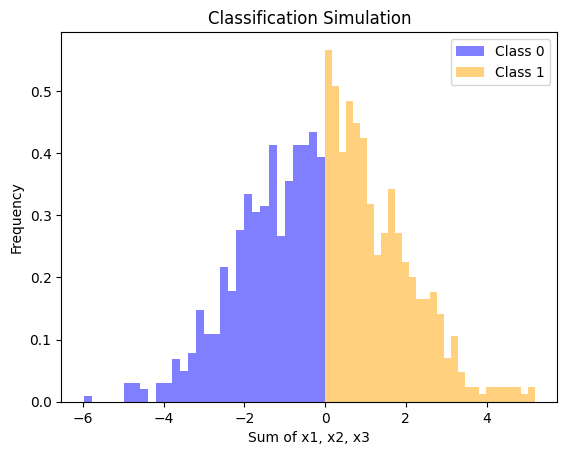

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
num_samples = 1000  # Number of samples
mean = 0  # Mean of the normal distribution
std_dev = 1  # Standard deviation of the normal distribution
threshold = 0  # Threshold for classification

# Generate random values for x1, x2, x3 from normal distribution
x1 = np.random.normal(mean, std_dev, num_samples)
x2 = np.random.normal(mean, std_dev, num_samples)
x3 = np.random.normal(mean, std_dev, num_samples)

# Calculate the sum of x1, x2, x3
sum_values = x1 + x2 + x3
X = np.column_stack((x1, x2, x3))

# Assign labels based on the sum compared to the threshold
labels = np.where(sum_values > threshold, 1, 0)

# Visualizing the distribution of the sum_values for each class
plt.hist(sum_values[labels == 0], bins=30, density=True, alpha=0.5, color='blue', label='Class 0')
plt.hist(sum_values[labels == 1], bins=30, density=True, alpha=0.5, color='orange', label='Class 1')
plt.title('Classification Simulation')
plt.xlabel('Sum of x1, x2, x3')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [39]:
# Split data into train and test sets
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
print("Logistic Regression Accuracy:", logistic_reg_accuracy)

# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Deep Neural Network (MLPClassifier)
dnn_model = MLPClassifier(hidden_layer_sizes=50, max_iter=1000)
dnn_model.fit(X_train, y_train)
dnn_pred = dnn_model.predict(X_test)
dnn_accuracy = accuracy_score(y_test, dnn_pred)
print("DNN (MLP) Accuracy:", dnn_accuracy)

Logistic Regression Accuracy: 0.995
SVM Accuracy: 0.995
KNN Accuracy: 0.94
Random Forest Accuracy: 0.96
DNN (MLP) Accuracy: 1.0


<Figure size 2000x400 with 0 Axes>

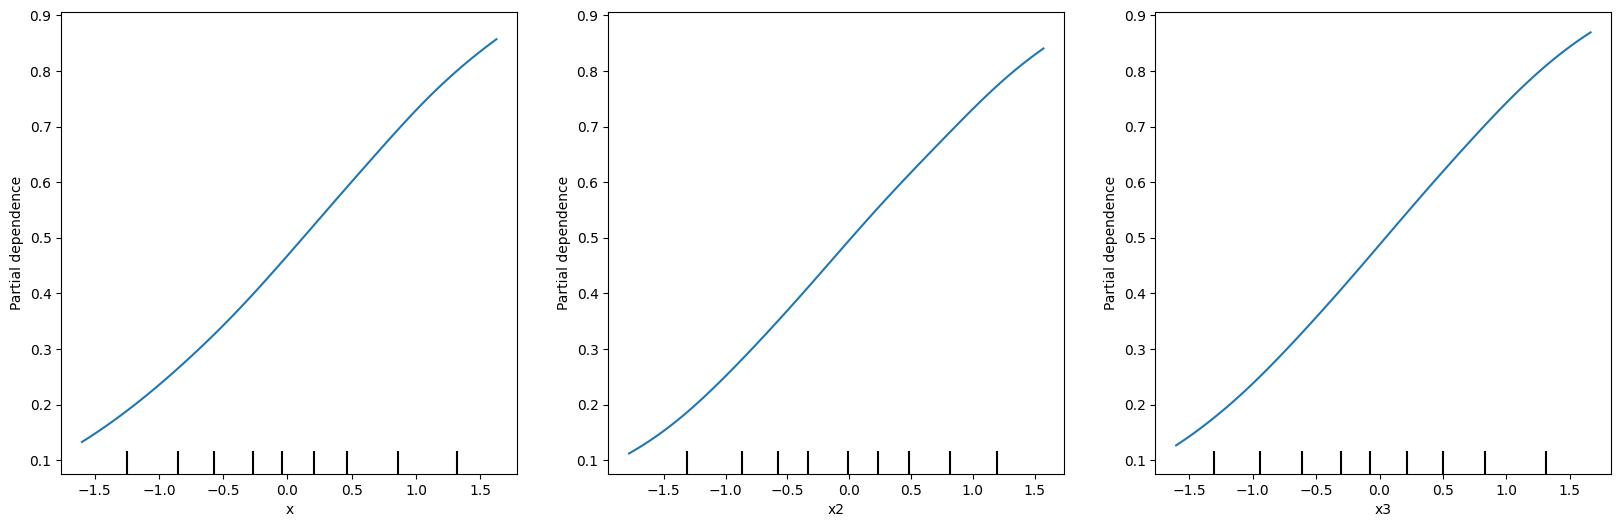

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

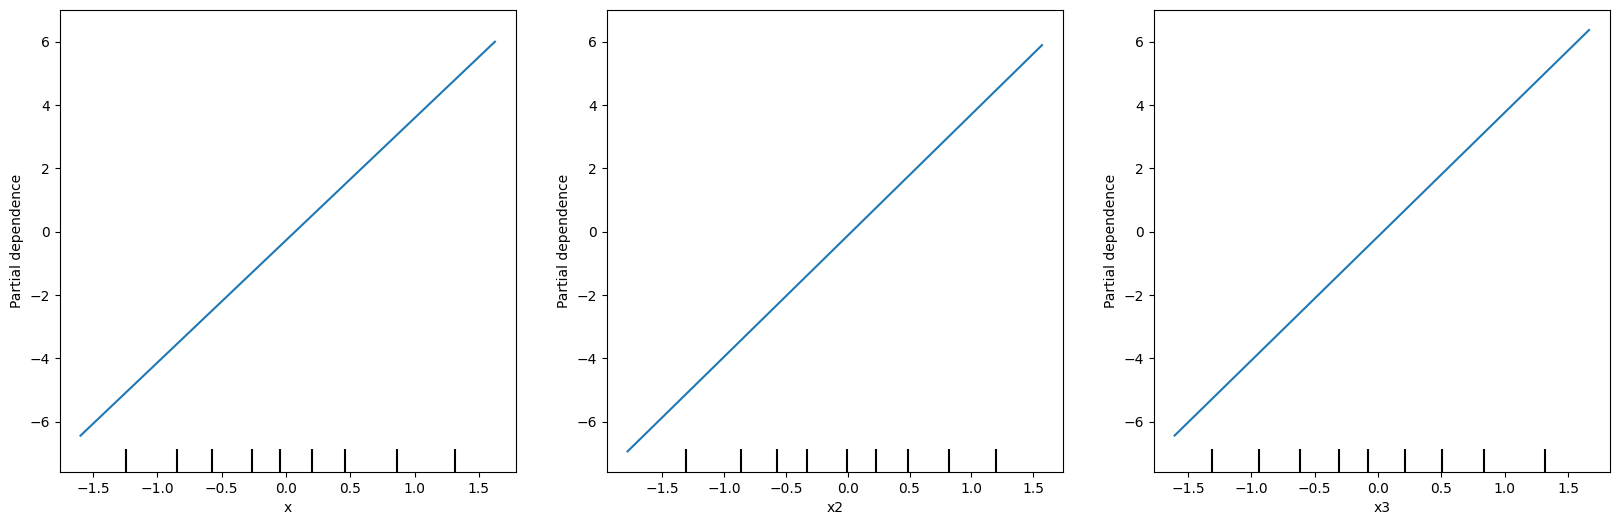

<Figure size 2000x400 with 0 Axes>

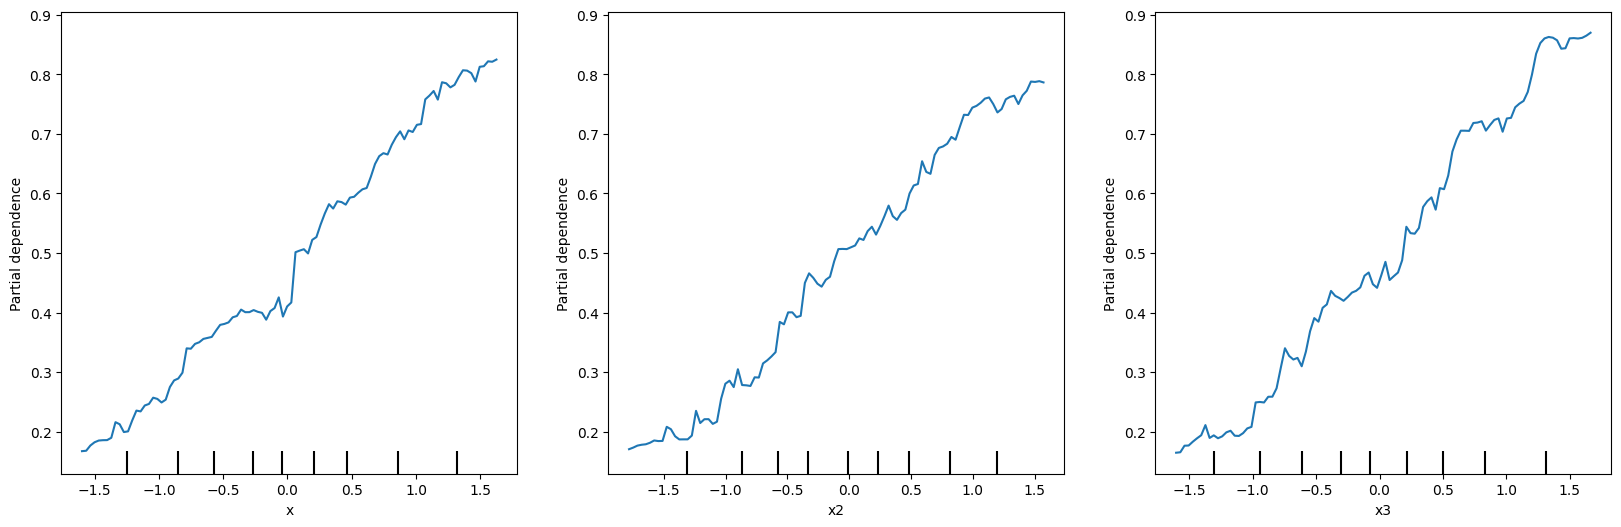

<Figure size 2000x400 with 0 Axes>

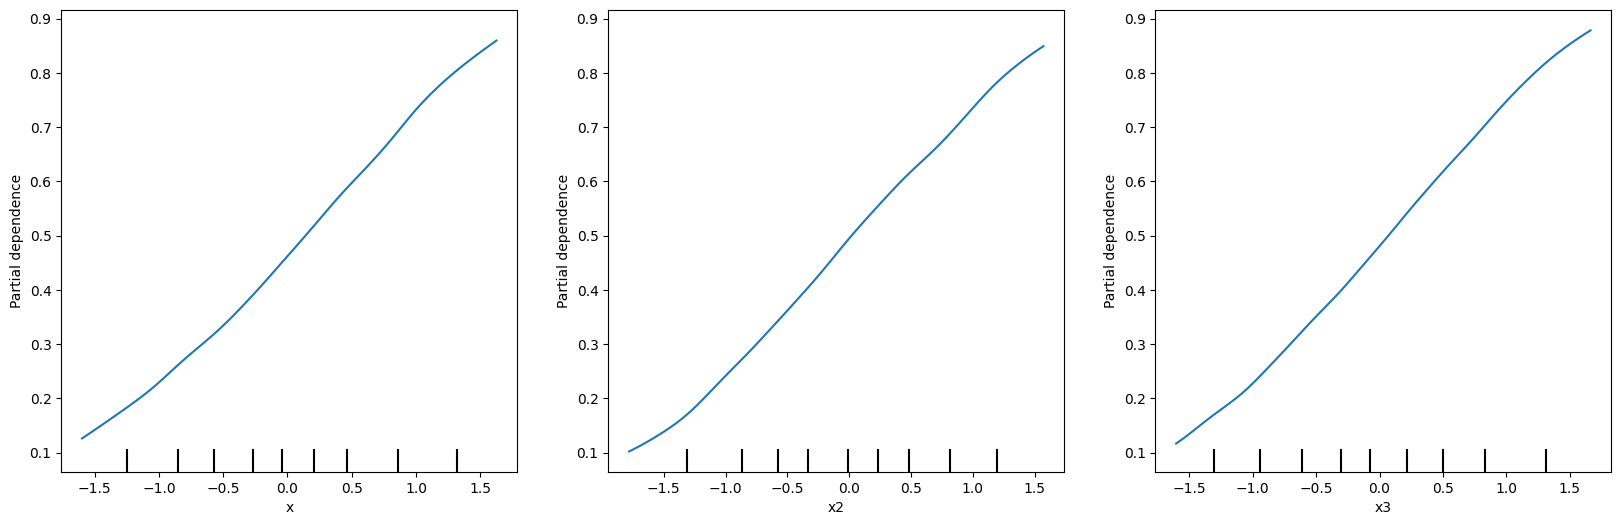

<Figure size 2000x400 with 0 Axes>

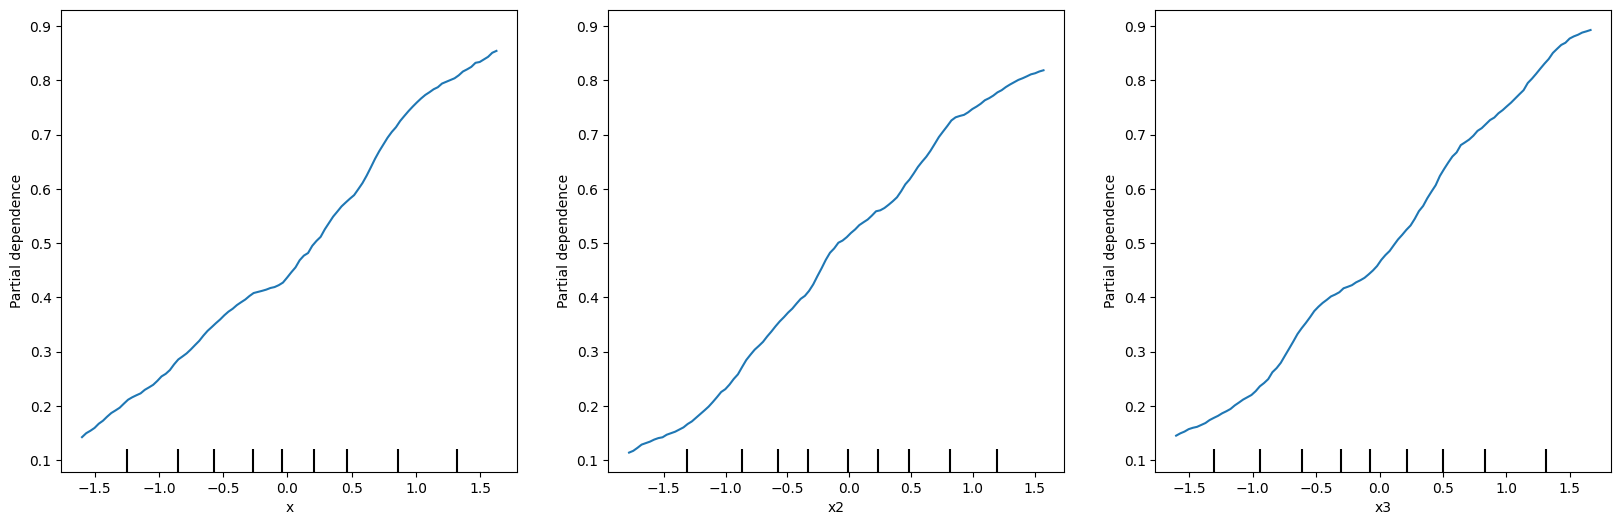

In [40]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pylab as plt

plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(logistic_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed


plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(svm_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(random_forest, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(dnn_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(knn_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])


In [78]:
# Split data into train and test sets
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Set the parameters
num_samples = 1000  # Number of samples
mean = 0  # Mean of the normal distribution
std_dev = 1  # Standard deviation of the normal distribution
threshold = 0  # Threshold for classification

# Generate random values for x1, x2, x3 from normal distribution
x1 = np.random.normal(mean, std_dev, num_samples)
x2 = np.random.normal(mean, std_dev, num_samples)
x3 = np.random.normal(mean, std_dev, num_samples)

# Calculate the sum of x1, x2, x3
sum_values = np.sin(3 * x1) + x2 + x3
X = np.column_stack((x1, x2, x3))

# Assign labels based on the sum compared to the threshold
labels = np.where(sum_values > threshold, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
print("Logistic Regression Accuracy:", logistic_reg_accuracy)

# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

# k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)
# xgb
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("xgb Accuracy:", xgb_accuracy)
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Deep Neural Network (MLPClassifier)
dnn_model = MLPClassifier(hidden_layer_sizes=50, max_iter=1000)
dnn_model.fit(X_train, y_train)
dnn_pred = dnn_model.predict(X_test)
dnn_accuracy = accuracy_score(y_test, dnn_pred)
print("DNN (MLP) Accuracy:", dnn_accuracy)

Logistic Regression Accuracy: 0.815
SVM Accuracy: 0.815
KNN Accuracy: 0.915
KNN Accuracy: 0.915
xgb Accuracy: 0.93
Random Forest Accuracy: 0.94
DNN (MLP) Accuracy: 0.915


C:\Users\versu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 2000x400 with 0 Axes>

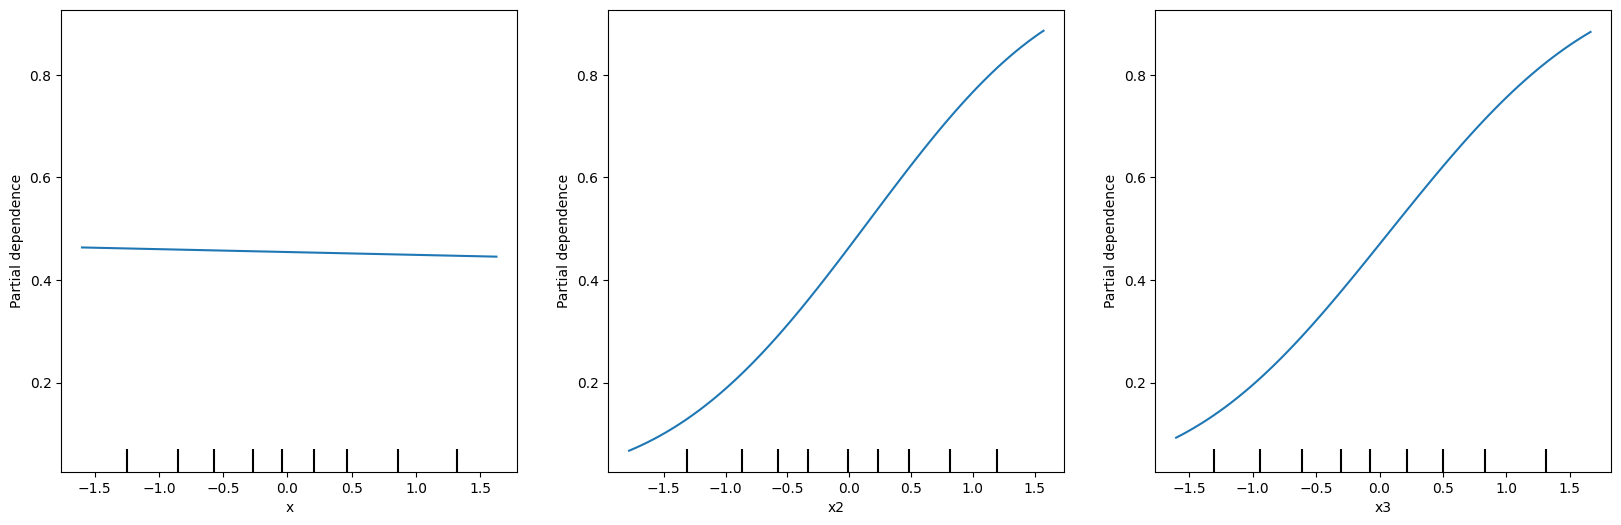

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

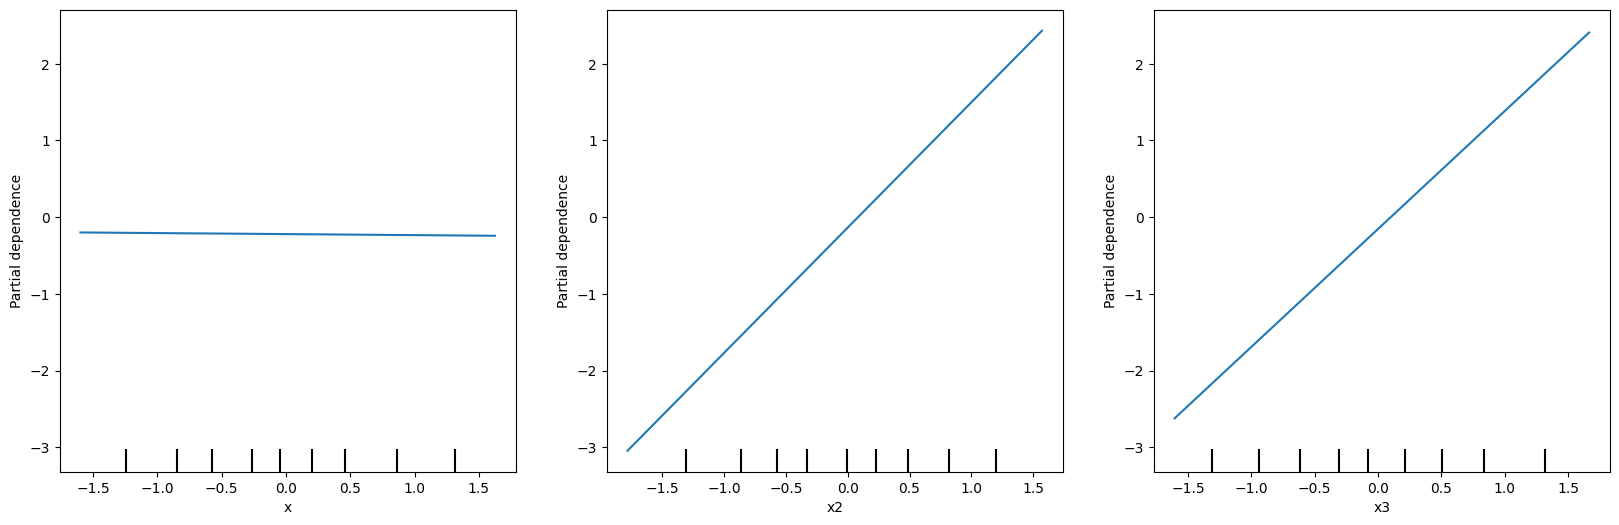

<Figure size 2000x400 with 0 Axes>

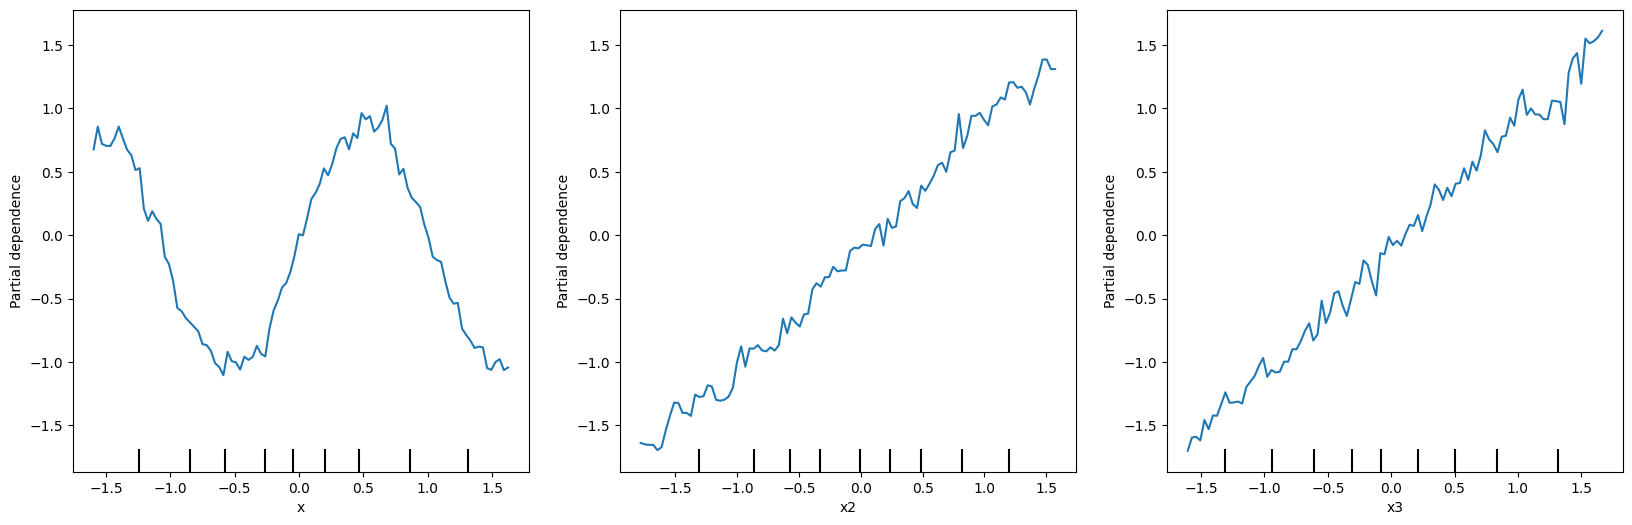

<Figure size 2000x400 with 0 Axes>

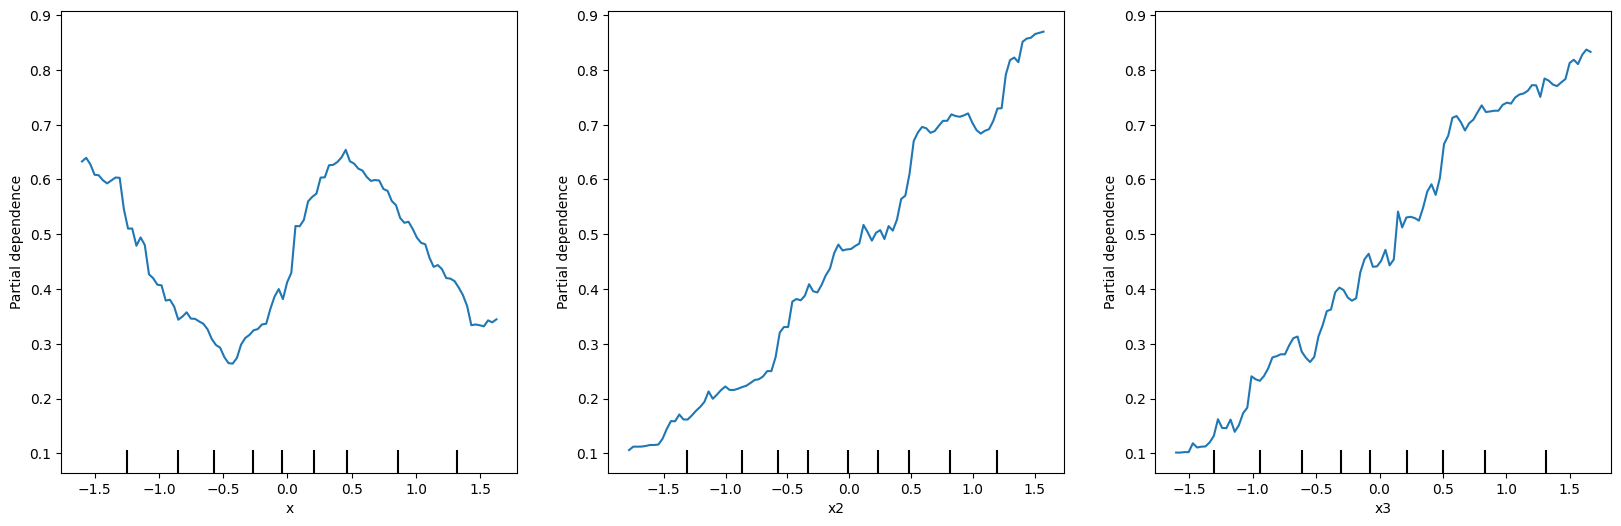

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

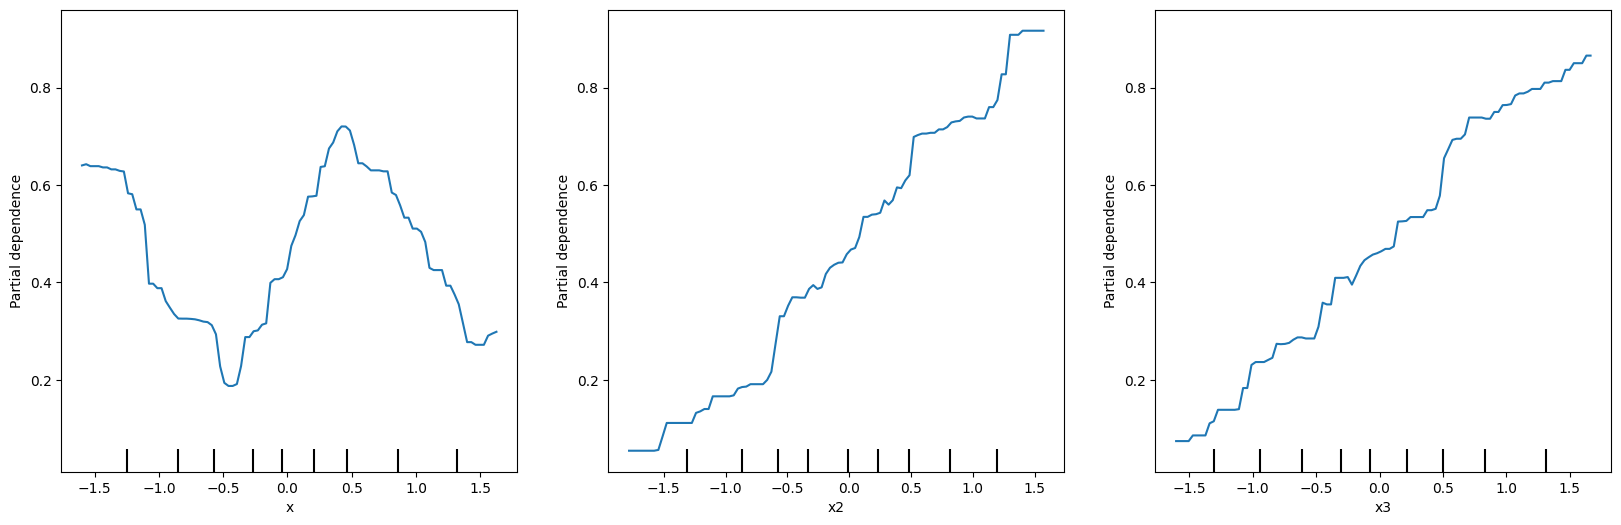

<Figure size 2000x400 with 0 Axes>

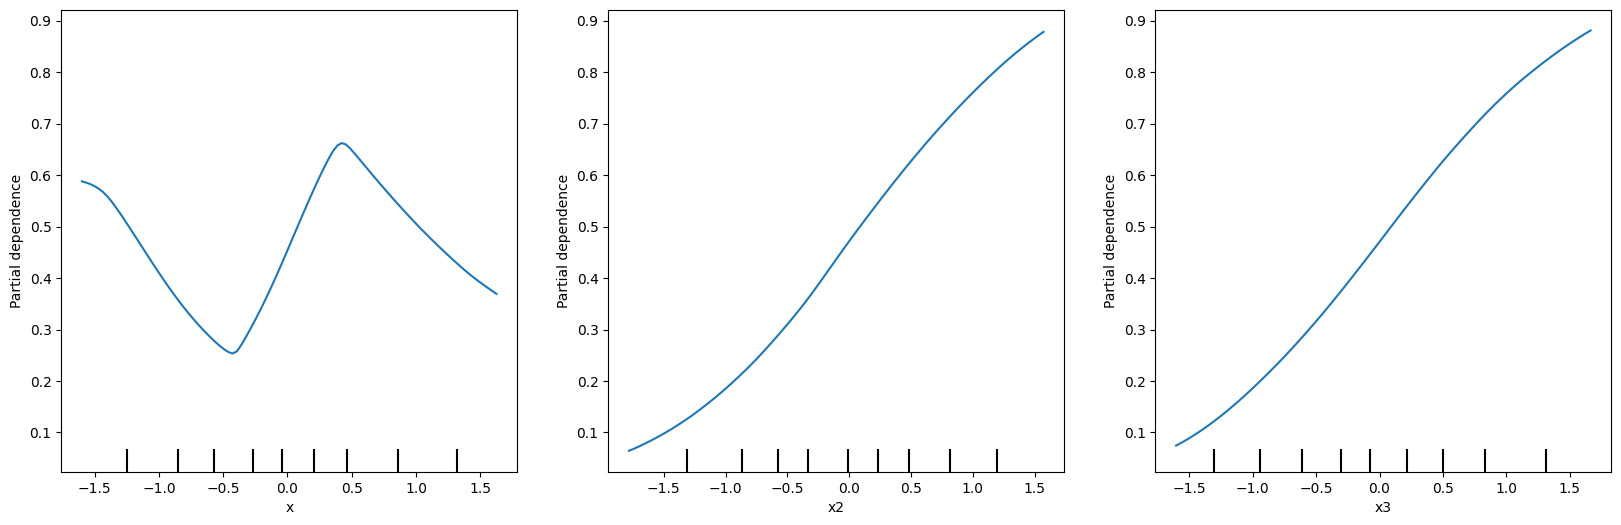

<Figure size 2000x400 with 0 Axes>

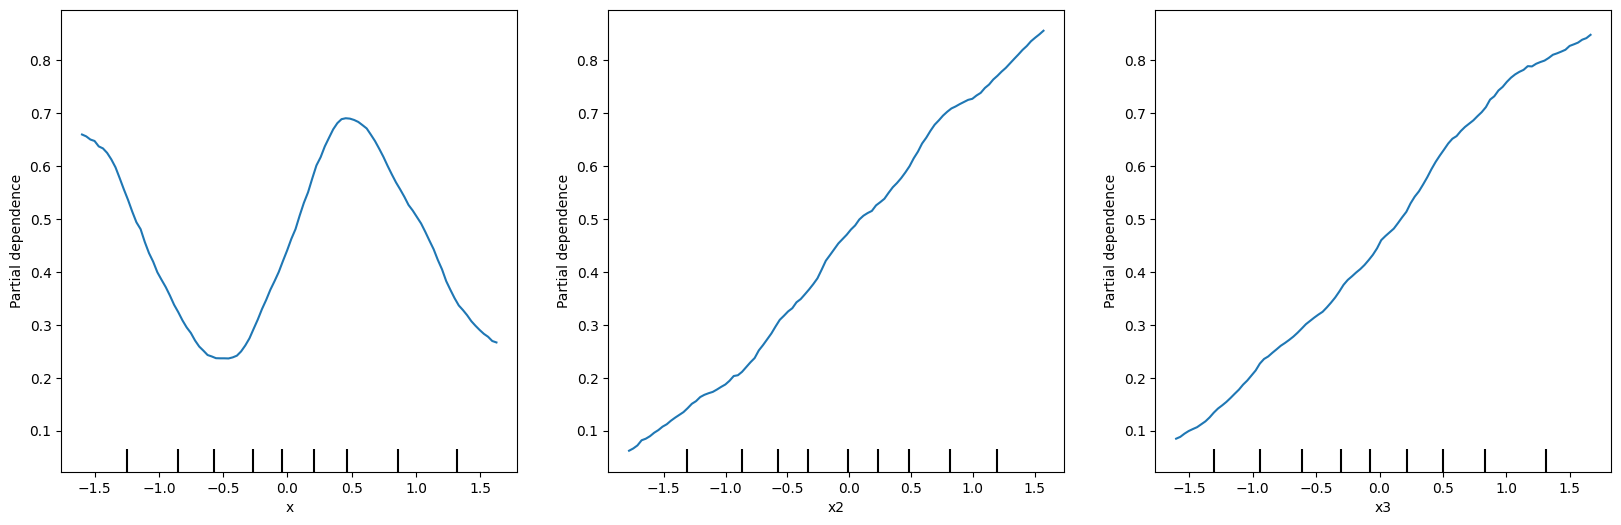

In [79]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pylab as plt

plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(logistic_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed


plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(svm_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(xgb_reg, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(random_forest, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(xgb_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(dnn_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
# First subplot with two lines for sine waves
fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20, 6))  # (rows, columns, index)
disp = PartialDependenceDisplay.from_estimator(knn_model, X_train, features=[0,1,2],feature_names=["x","x2","x3"], ax=[ax1,ax2,ax3])
